### **Predicción de Planes de Pensiones usando Modelos de Clasificación**
---



## 1. Importación de Librerías

En esta sección importamos todas las librerías necesarias para la manipulación de datos, visualización, y la implementación de los modelos de clasificación.

In [120]:
#para gestionar los datos
import pandas as pd
import numpy as np



#para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Para dividir dataset entre  teain y test
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



## 2. Conexión a la Fuente de Datos e Importación

Aquí conectamos Google Drive para acceder a los datasets necesarios y los cargamos en dataframes para su análisis.

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
customers =pd.read_csv("/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/customers.csv")
products =pd.read_csv("/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/products.csv")
sales =pd.read_csv("/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/sales.csv")

## 3. Exploración de Datos (EDA)

Realizamos una exploración inicial de los datos para entender su estructura, tamaño, y tipos de variables.

In [123]:
print(customers.shape, products.shape, sales.shape)


(151493, 25) (13, 3) (238574, 5)


In [124]:
print(customers.head(),'\n','\n', products.head(),'\n','\n', sales.head())

   customer_id country_id  region_code gender  age    salary entry_date  \
0        15891         ES         28.0      H   59       NaN    2022-07   
1        16203         ES          8.0      V   70       NaN    2022-12   
2        16502         ES         28.0      H   58       NaN    2022-09   
3        17457         ES         28.0      H   53  25601.44    2021-09   
4        17970         ES         28.0      V   75       NaN    2019-04   

  entry_channel  active_customer            segment  ...  long_term_deposit  \
0           KAT              1.0                NaN  ...                  0   
1           KAT              1.0  02 - PARTICULARES  ...                  0   
2           KHN              1.0  02 - PARTICULARES  ...                  0   
3           KAT              1.0  02 - PARTICULARES  ...                  1   
4           KAT              1.0  02 - PARTICULARES  ...                  0   

   em_account_pp  credit_card  payroll  pension_plan  payroll_account  \
0

In [125]:
print(customers.info(), '\n','\n', products.info(),'\n','\n', sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151493 entries, 0 to 151492
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         151493 non-null  int64  
 1   country_id          151493 non-null  object 
 2   region_code         151444 non-null  float64
 3   gender              151491 non-null  object 
 4   age                 151493 non-null  int64  
 5   salary              77194 non-null   float64
 6   entry_date          151493 non-null  object 
 7   entry_channel       89108 non-null   object 
 8   active_customer     151493 non-null  float64
 9   segment             88867 non-null   object 
 10  short_term_deposit  151493 non-null  int64  
 11  loans               151493 non-null  int64  
 12  mortgage            151493 non-null  int64  
 13  funds               151493 non-null  int64  
 14  securities          151493 non-null  int64  
 15  long_term_deposit   151493 non-nul

## 4. Preparación de Datos

Unimos los datasets de clientes y ventas, y filtramos la información relevante para crear un dataset que será utilizado para el entrenamiento del modelo.

### Definid DF: df_last_pension

In [126]:
# Unir tablas clientes y ventas
df_merged = pd.merge(customers, sales, on='customer_id', how='left')

df_merged.head()

customer_id country_id  region_code gender  age    salary entry_date  \
0        15891         ES         28.0      H   59       NaN    2022-07   
1        16203         ES          8.0      V   70       NaN    2022-12   
2        16502         ES         28.0      H   58       NaN    2022-09   
3        16502         ES         28.0      H   58       NaN    2022-09   
4        17457         ES         28.0      H   53  25601.44    2021-09   

  entry_channel  active_customer            segment  ...  pension_plan  \
0           KAT              1.0                NaN  ...             0   
1           KAT              1.0  02 - PARTICULARES  ...             0   
2           KHN              1.0  02 - PARTICULARES  ...             0   
3           KHN              1.0  02 - PARTICULARES  ...             0   
4           KAT              1.0  02 - PARTICULARES  ...             0   

   payroll_account  emc_account  debit_card  em_account_p  em_acount  sale_id  \
0                0            0           0             0          1   130004   
1                0            0           0             0          1   130005   
2                0            1           0             0          1    78841   
3                0            1           0             0          1   130006   
4                0            0           1             0          1    91164   

   month_sale  product_id  net_margin  
0     2022-07        4657      16.600  
1     2023-01        4657      24.175  
2     2023-01        8871      17.150  
3     2022-10        4657      16.075  
4     2022-09        3819      14.000  

[5 rows x 29 columns]

In [127]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238574 entries, 0 to 238573
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         238574 non-null  int64  
 1   country_id          238574 non-null  object 
 2   region_code         238495 non-null  float64
 3   gender              238571 non-null  object 
 4   age                 238574 non-null  int64  
 5   salary              130966 non-null  float64
 6   entry_date          238574 non-null  object 
 7   entry_channel       175135 non-null  object 
 8   active_customer     238574 non-null  float64
 9   segment             174874 non-null  object 
 10  short_term_deposit  238574 non-null  int64  
 11  loans               238574 non-null  int64  
 12  mortgage            238574 non-null  int64  
 13  funds               238574 non-null  int64  
 14  securities          238574 non-null  int64  
 15  long_term_deposit   238574 non-nul

In [128]:
# Ordenar por customer_id y luego por month_sale para asegurarnos de identificar la última compra.
df_merged_sorted = df_merged.sort_values(by=['customer_id', 'month_sale'])
df_merged_sorted.head()

customer_id country_id  region_code gender  age    salary entry_date  \
0        15891         ES         28.0      H   59       NaN    2022-07   
1        16203         ES          8.0      V   70       NaN    2022-12   
3        16502         ES         28.0      H   58       NaN    2022-09   
2        16502         ES         28.0      H   58       NaN    2022-09   
4        17457         ES         28.0      H   53  25601.44    2021-09   

  entry_channel  active_customer            segment  ...  pension_plan  \
0           KAT              1.0                NaN  ...             0   
1           KAT              1.0  02 - PARTICULARES  ...             0   
3           KHN              1.0  02 - PARTICULARES  ...             0   
2           KHN              1.0  02 - PARTICULARES  ...             0   
4           KAT              1.0  02 - PARTICULARES  ...             0   

   payroll_account  emc_account  debit_card  em_account_p  em_acount  sale_id  \
0                0            0           0             0          1   130004   
1                0            0           0             0          1   130005   
3                0            1           0             0          1   130006   
2                0            1           0             0          1    78841   
4                0            0           1             0          1    91164   

   month_sale  product_id  net_margin  
0     2022-07        4657      16.600  
1     2023-01        4657      24.175  
3     2022-10        4657      16.075  
2     2023-01        8871      17.150  
4     2022-09        3819      14.000  

[5 rows x 29 columns]

In [129]:
df_merged_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238574 entries, 0 to 238573
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         238574 non-null  int64  
 1   country_id          238574 non-null  object 
 2   region_code         238495 non-null  float64
 3   gender              238571 non-null  object 
 4   age                 238574 non-null  int64  
 5   salary              130966 non-null  float64
 6   entry_date          238574 non-null  object 
 7   entry_channel       175135 non-null  object 
 8   active_customer     238574 non-null  float64
 9   segment             174874 non-null  object 
 10  short_term_deposit  238574 non-null  int64  
 11  loans               238574 non-null  int64  
 12  mortgage            238574 non-null  int64  
 13  funds               238574 non-null  int64  
 14  securities          238574 non-null  int64  
 15  long_term_deposit   238574 non-null  in

In [130]:
#  Filtrar la última compra de cada cliente
df_last = df_merged_sorted.groupby('customer_id').tail(1)
df_last.head()


customer_id country_id  region_code gender  age    salary entry_date  \
0        15891         ES         28.0      H   59       NaN    2022-07   
1        16203         ES          8.0      V   70       NaN    2022-12   
2        16502         ES         28.0      H   58       NaN    2022-09   
4        17457         ES         28.0      H   53  25601.44    2021-09   
5        17970         ES         28.0      V   75       NaN    2019-04   

  entry_channel  active_customer            segment  ...  pension_plan  \
0           KAT              1.0                NaN  ...             0   
1           KAT              1.0  02 - PARTICULARES  ...             0   
2           KHN              1.0  02 - PARTICULARES  ...             0   
4           KAT              1.0  02 - PARTICULARES  ...             0   
5           KAT              1.0  02 - PARTICULARES  ...             1   

   payroll_account  emc_account  debit_card  em_account_p  em_acount  sale_id  \
0                0            0           0             0          1   130004   
1                0            0           0             0          1   130005   
2                0            1           0             0          1    78841   
4                0            0           1             0          1    91164   
5                1            1           1             0          0    12022   

   month_sale  product_id  net_margin  
0     2022-07        4657      16.600  
1     2023-01        4657      24.175  
2     2023-01        8871      17.150  
4     2022-09        3819      14.000  
5     2023-02        2673     207.575  

[5 rows x 29 columns]

In [131]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151493 entries, 0 to 238573
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         151493 non-null  int64  
 1   country_id          151493 non-null  object 
 2   region_code         151444 non-null  float64
 3   gender              151491 non-null  object 
 4   age                 151493 non-null  int64  
 5   salary              77194 non-null   float64
 6   entry_date          151493 non-null  object 
 7   entry_channel       89108 non-null   object 
 8   active_customer     151493 non-null  float64
 9   segment             88867 non-null   object 
 10  short_term_deposit  151493 non-null  int64  
 11  loans               151493 non-null  int64  
 12  mortgage            151493 non-null  int64  
 13  funds               151493 non-null  int64  
 14  securities          151493 non-null  int64  
 15  long_term_deposit   151493 non-null  in

In [132]:
# Filtrar solo aquellos donde la última compra es 'product_id' = 1364 (pension_plan). Asi sabemos como eran quienes compraron este producto.
 #(Los que lo hayan adquirido previamente no nos sirven porque partimos de la idea de que los datos de customers son actualizados a la última compra)
df_last_pension = df_last[df_last['product_id'] == 1364]
df_last_pension.head()


customer_id country_id  region_code gender  age    salary entry_date  \
153        62943         ES         28.0      H   48  37631.30    2020-12   
180        74455         ES         28.0      H   47  27809.62    2020-01   
244       104152         ES         28.0      V   53  56555.02    2022-07   
263       113436         ES         28.0      V   65  57761.07    2020-02   
292       120000         ES         35.0      V   47  26671.94    2021-06   

    entry_channel  active_customer            segment  ...  pension_plan  \
153           KAT              1.0  02 - PARTICULARES  ...             1   
180           KAT              1.0  02 - PARTICULARES  ...             1   
244           KAT              1.0  02 - PARTICULARES  ...             1   
263           KAT              1.0  02 - PARTICULARES  ...             1   
292           013              1.0  02 - PARTICULARES  ...             1   

     payroll_account  emc_account  debit_card  em_account_p  em_acount  \
153                1            0           1             0          0   
180                1            0           1             0          0   
244                1            0           0             0          0   
263                1            0           1             0          0   
292                1            0           0             0          0   

     sale_id  month_sale  product_id  net_margin  
153    41370     2022-06        1364    1229.050  
180    41372     2022-02        1364     989.175  
244    41375     2023-04        1364     875.100  
263    41376     2022-06        1364    1229.075  
292    41378     2022-02        1364    1813.800  

[5 rows x 29 columns]

In [133]:
df_last_pension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2718 entries, 153 to 236719
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         2718 non-null   int64  
 1   country_id          2718 non-null   object 
 2   region_code         2716 non-null   float64
 3   gender              2718 non-null   object 
 4   age                 2718 non-null   int64  
 5   salary              2105 non-null   float64
 6   entry_date          2718 non-null   object 
 7   entry_channel       2716 non-null   object 
 8   active_customer     2718 non-null   float64
 9   segment             2716 non-null   object 
 10  short_term_deposit  2718 non-null   int64  
 11  loans               2718 non-null   int64  
 12  mortgage            2718 non-null   int64  
 13  funds               2718 non-null   int64  
 14  securities          2718 non-null   int64  
 15  long_term_deposit   2718 non-null   int64  
 16  em_acco

In [134]:
df_last_pension['pension_plan'].value_counts()

pension_plan
1    2718
Name: count, dtype: int64

### Definir DF: df_last_no_pension

In [135]:
# Filtrar aquellos que no tienen 'pension_plan' y elegir al azar una muestra de 3000 para el modelo

df_last_no = df_last[df_last['pension_plan'] == 0]
df_last_no_pension = df_last_no.sample(n=3000, random_state=42)
df_last_no_pension.head(10)

customer_id country_id  region_code gender  age    salary entry_date  \
11002       1044274         ES          3.0      H   24  38282.37    2019-08   
142016      1435856         ES         28.0      H   22  27412.15    2022-08   
120419      1411253         ES          8.0      V   25  27843.33    2022-07   
6457        1013612         ES         26.0      V   52       NaN    2019-12   
130872      1423256         ES          8.0      V   21  40469.34    2022-07   
194362      1496455         ES         20.0      H   37       NaN    2022-11   
202378      1506335         ES         43.0      H   20       NaN    2022-11   
72994       1362914         ES         50.0      V   21  19472.92    2021-11   
22732       1121585         ES         41.0      H   25  24463.09    2020-02   
113103      1404211         ES         28.0      V   38  43523.65    2022-07   

       entry_channel  active_customer             segment  ...  pension_plan  \
11002            KHE              1.0  03 - UNIVERSITARIO  ...             0   
142016           KHO              1.0  03 - UNIVERSITARIO  ...             0   
120419           NaN              0.0                 NaN  ...             0   
6457             KAT              1.0   02 - PARTICULARES  ...             0   
130872           KHQ              0.0  03 - UNIVERSITARIO  ...             0   
194362           NaN              0.0                 NaN  ...             0   
202378           NaN              0.0                 NaN  ...             0   
72994            RED              0.0  03 - UNIVERSITARIO  ...             0   
22732            KFC              1.0  03 - UNIVERSITARIO  ...             0   
113103           NaN              1.0                 NaN  ...             0   

        payroll_account  emc_account  debit_card  em_account_p  em_acount  \
11002                 0            0           1             0          1   
142016                1            0           0             0          0   
120419                0            0           0             0          1   
6457                  0            0           0             0          1   
130872                0            0           0             0          1   
194362                0            0           0             0          1   
202378                0            0           0             0          1   
72994                 0            0           1             0          0   
22732                 0            0           1             0          1   
113103                0            0           0             0          1   

        sale_id  month_sale  product_id  net_margin  
11002     93533     2023-05        3819      14.000  
142016    74349     2022-11        2235      18.475  
120419   161347     2022-07        4657      18.550  
6457      11237     2022-06        1119     267.675  
130872   170351     2022-08        4657      19.400  
194362   219458     2022-11        4657      18.975  
202378   225177     2022-11        4657      16.250  
72994    110583     2023-04        3819      14.500  
22732     96680     2023-03        3819      15.000  
113103   156290     2022-07        4657      17.825  

[10 rows x 29 columns]

In [136]:
df_last_no_pension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 11002 to 170652
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3000 non-null   int64  
 1   country_id          3000 non-null   object 
 2   region_code         3000 non-null   float64
 3   gender              3000 non-null   object 
 4   age                 3000 non-null   int64  
 5   salary              1466 non-null   float64
 6   entry_date          3000 non-null   object 
 7   entry_channel       1617 non-null   object 
 8   active_customer     3000 non-null   float64
 9   segment             1611 non-null   object 
 10  short_term_deposit  3000 non-null   int64  
 11  loans               3000 non-null   int64  
 12  mortgage            3000 non-null   int64  
 13  funds               3000 non-null   int64  
 14  securities          3000 non-null   int64  
 15  long_term_deposit   3000 non-null   int64  
 16  em_ac

### Definir DF: a_predict

In [137]:
#creo df con todos los clientes que no tienen pension plan para al final calcular propensión
a_predict = df_last_no.copy()

In [138]:
a_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131755 entries, 0 to 238573
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         131755 non-null  int64  
 1   country_id          131755 non-null  object 
 2   region_code         131713 non-null  float64
 3   gender              131753 non-null  object 
 4   age                 131755 non-null  int64  
 5   salary              63159 non-null   float64
 6   entry_date          131755 non-null  object 
 7   entry_channel       69467 non-null   object 
 8   active_customer     131755 non-null  float64
 9   segment             69227 non-null   object 
 10  short_term_deposit  131755 non-null  int64  
 11  loans               131755 non-null  int64  
 12  mortgage            131755 non-null  int64  
 13  funds               131755 non-null  int64  
 14  securities          131755 non-null  int64  
 15  long_term_deposit   131755 non-null  in

Eliminar columnas que eran de Sales, se usaron para definir los limites del dataset pero no son datos que vayan a estar al momento de predecir.

In [139]:
df_last_pension.drop(['sale_id','month_sale','product_id','net_margin'], axis=1, inplace=True)
df_last_no_pension.drop(['sale_id','month_sale','product_id','net_margin'], axis=1, inplace=True)
a_predict.drop(['sale_id','month_sale','product_id','net_margin'], axis=1, inplace=True)

<ipython-input-139-362d53f8d0df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension.drop(['sale_id','month_sale','product_id','net_margin'], axis=1, inplace=True)


In [140]:
print(a_predict.shape, df_last_pension.shape, df_last_no_pension.shape)

(131755, 25) (2718, 25) (3000, 25)


## 5. Limpieza de Datos

Manejamos los valores nulos y realizamos otras tareas de limpieza para preparar los datos para el modelado.

In [141]:
print(df_last_pension.isnull().any().sum(), df_last_no_pension.isnull().any().sum(), a_predict.isnull().any().sum())

4 3 5


In [142]:
df_last_pension.isnull().sum()

customer_id             0
country_id              0
region_code             2
gender                  0
age                     0
salary                613
entry_date              0
entry_channel           2
active_customer         0
segment                 2
short_term_deposit      0
loans                   0
mortgage                0
funds                   0
securities              0
long_term_deposit       0
em_account_pp           0
credit_card             0
payroll                 0
pension_plan            0
payroll_account         0
emc_account             0
debit_card              0
em_account_p            0
em_acount               0
dtype: int64

In [143]:
# reemplazo sueldos nuls por media y; region_code, entry_channel y segment por moda
df_last_pension['region_code'].fillna(df_last_pension['region_code'].mode()[0], inplace=True)
df_last_pension['salary'].fillna(df_last_pension["salary"].mean(),inplace=True)
df_last_pension['entry_channel'].fillna(df_last_pension['entry_channel'].mode()[0], inplace=True)
df_last_pension['segment'].fillna(df_last_pension['segment'].mode()[0], inplace=True)
df_last_pension.isnull().any().sum()

<ipython-input-143-128232372c4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension['region_code'].fillna(df_last_pension['region_code'].mode()[0], inplace=True)
<ipython-input-143-128232372c4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension['salary'].fillna(df_last_pension["salary"].mean(),inplace=True)
<ipython-input-143-128232372c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension['en

0

In [144]:
df_last_no_pension.isnull().sum()

customer_id              0
country_id               0
region_code              0
gender                   0
age                      0
salary                1534
entry_date               0
entry_channel         1383
active_customer          0
segment               1389
short_term_deposit       0
loans                    0
mortgage                 0
funds                    0
securities               0
long_term_deposit        0
em_account_pp            0
credit_card              0
payroll                  0
pension_plan             0
payroll_account          0
emc_account              0
debit_card               0
em_account_p             0
em_acount                0
dtype: int64

In [145]:
# reemplazo sueldos nuls por media y;  entry_channel y segment por moda
df_last_no_pension['salary'].fillna(df_last_no_pension["salary"].mean(),inplace=True)
df_last_no_pension['entry_channel'].fillna(df_last_no_pension['entry_channel'].mode()[0], inplace=True)
df_last_no_pension['segment'].fillna(df_last_no_pension['segment'].mode()[0], inplace=True)
df_last_no_pension.isnull().any().sum()

0

In [146]:
#en a_predict dejo solo los registros completos
a_predict.isnull().sum()

customer_id               0
country_id                0
region_code              42
gender                    2
age                       0
salary                68596
entry_date                0
entry_channel         62288
active_customer           0
segment               62528
short_term_deposit        0
loans                     0
mortgage                  0
funds                     0
securities                0
long_term_deposit         0
em_account_pp             0
credit_card               0
payroll                   0
pension_plan              0
payroll_account           0
emc_account               0
debit_card                0
em_account_p              0
em_acount                 0
dtype: int64

In [147]:
a_predict.dropna(subset=["salary"], inplace=True)
a_predict.isnull().sum()

customer_id               0
country_id                0
region_code               2
gender                    2
age                       0
salary                    0
entry_date                0
entry_channel         21389
active_customer           0
segment               21428
short_term_deposit        0
loans                     0
mortgage                  0
funds                     0
securities                0
long_term_deposit         0
em_account_pp             0
credit_card               0
payroll                   0
pension_plan              0
payroll_account           0
emc_account               0
debit_card                0
em_account_p              0
em_acount                 0
dtype: int64

In [148]:
a_predict.dropna(subset=["segment"], inplace=True)
a_predict.isnull().sum()

customer_id            0
country_id             0
region_code            2
gender                 2
age                    0
salary                 0
entry_date             0
entry_channel         23
active_customer        0
segment                0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll                0
pension_plan           0
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [149]:
a_predict.dropna(subset=["entry_channel"], inplace=True)
a_predict.isnull().sum()

customer_id           0
country_id            0
region_code           2
gender                2
age                   0
salary                0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

In [150]:
a_predict.dropna(subset=["region_code"], inplace=True)
a_predict.isnull().sum()

customer_id           0
country_id            0
region_code           0
gender                2
age                   0
salary                0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

In [151]:
a_predict.dropna(subset=["gender"], inplace=True)
a_predict.isnull().sum()

customer_id           0
country_id            0
region_code           0
gender                0
age                   0
salary                0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

## 6. Preparación del Dataset para el Modelo

Unimos y barajamos los datasets de clientes con y sin plan de pensiones, eliminando columnas irrelevantes y agrupando categorías poco frecuentes.

In [152]:
# Unir los DF df_last_no_pension y df_last_pension
df = pd.concat([df_last_no_pension, df_last_pension])

# Desordenar el dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificamos el tamaño del dataset unido y la distribución de la columna 'pension_plan'
print(f'Tamaño del DataFrame unido: {df.shape}')
print('Distribución de la columna pension_plan:')
print(df['pension_plan'].value_counts())

Tamaño del DataFrame unido: (5718, 25)
Distribución de la columna pension_plan:
pension_plan
0    3000
1    2718
Name: count, dtype: int64


Filas duplicadas?

In [153]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [customer_id, country_id, region_code, gender, age, salary, entry_date, entry_channel, active_customer, segment, short_term_deposit, loans, mortgage, funds, securities, long_term_deposit, em_account_pp, credit_card, payroll, pension_plan, payroll_account, emc_account, debit_card, em_account_p, em_acount]
Index: []

[0 rows x 25 columns]

In [154]:
a_predict[a_predict.duplicated(keep=False)]

Empty DataFrame
Columns: [customer_id, country_id, region_code, gender, age, salary, entry_date, entry_channel, active_customer, segment, short_term_deposit, loans, mortgage, funds, securities, long_term_deposit, em_account_pp, credit_card, payroll, pension_plan, payroll_account, emc_account, debit_card, em_account_p, em_acount]
Index: []

[0 rows x 25 columns]

In [155]:
df.nunique()

customer_id           5718
country_id               3
region_code             52
gender                   2
age                     90
salary                3549
entry_date              53
entry_channel           21
active_customer          2
segment                  3
short_term_deposit       2
loans                    2
mortgage                 2
funds                    2
securities               2
long_term_deposit        2
em_account_pp            1
credit_card              2
payroll                  2
pension_plan             2
payroll_account          2
emc_account              2
debit_card               2
em_account_p             1
em_acount                2
dtype: int64

### Elimino columnas
 duplicadas o que tienen solo 1 valor o no aportan

In [156]:
df2=df.drop(columns=['em_account_pp','em_account_p','customer_id', 'entry_date',  'active_customer'])
df2.nunique()

country_id               3
region_code             52
gender                   2
age                     90
salary                3549
entry_channel           21
segment                  3
short_term_deposit       2
loans                    2
mortgage                 2
funds                    2
securities               2
long_term_deposit        2
credit_card              2
payroll                  2
pension_plan             2
payroll_account          2
emc_account              2
debit_card               2
em_acount                2
dtype: int64

In [157]:
a_predict2=a_predict.copy()

# En a_predict customer_id como index
a_predict2.set_index('customer_id', drop=True, inplace=True)
a_predict2.drop(columns=['em_account_pp','em_account_p','entry_date', 'active_customer'], inplace=True)

a_predict2.nunique()

country_id                1
region_code              50
gender                    2
age                      83
salary                39497
entry_channel            38
segment                   3
short_term_deposit        2
loans                     2
mortgage                  2
funds                     2
securities                2
long_term_deposit         2
credit_card               2
payroll                   1
pension_plan              1
payroll_account           2
emc_account               2
debit_card                2
em_acount                 2
dtype: int64

### Analizar variables segun tipo

country_id 
 country_id
ES    5716
SA       1
FR       1
Name: count, dtype: int64 

[[<Axes: title={'center': 'region_code'}>]]
gender 
 gender
V    3058
H    2660
Name: count, dtype: int64 

[[<Axes: title={'center': 'age'}>]]
[[<Axes: title={'center': 'salary'}>]]
entry_channel 
 entry_channel
KHM    1838
KFC    1328
KHE     675
KAT     600
KHN     341
KHK     275
KHQ     221
RED     153
KFA     141
KHL      70
KHO      28
KHD      11
KAZ      11
KHF      10
KHC       8
KBG       3
KFD       1
007       1
KAE       1
KAG       1
013       1
Name: count, dtype: int64 

segment 
 segment
02 - PARTICULARES     4119
03 - UNIVERSITARIO    1417
01 - TOP               182
Name: count, dtype: int64 

[[<Axes: title={'center': 'short_term_deposit'}>]]
[[<Axes: title={'center': 'loans'}>]]
[[<Axes: title={'center': 'mortgage'}>]]
[[<Axes: title={'center': 'funds'}>]]
[[<Axes: title={'center': 'securities'}>]]
[[<Axes: title={'center': 'long_term_deposit'}>]]
[[<Axes: title={'center': 'credit_

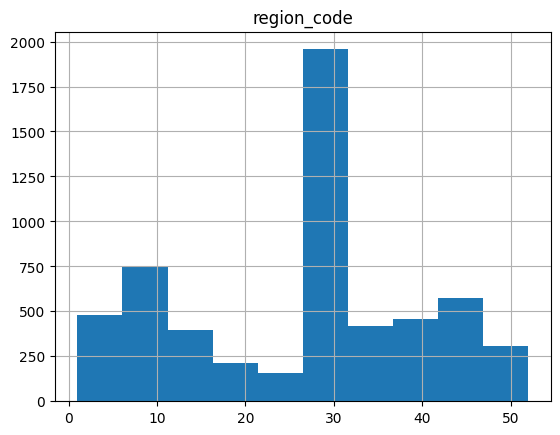

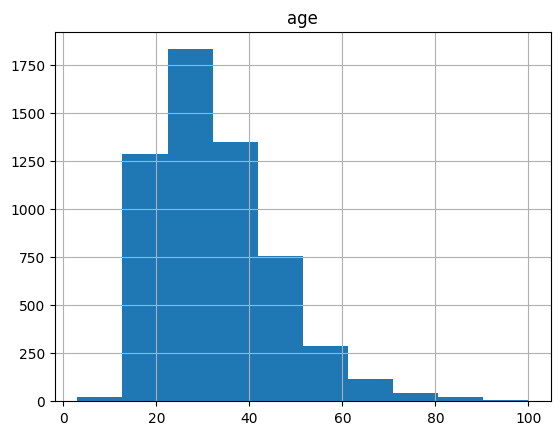

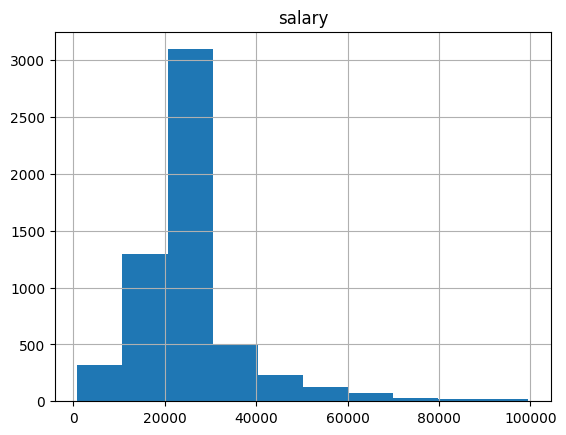

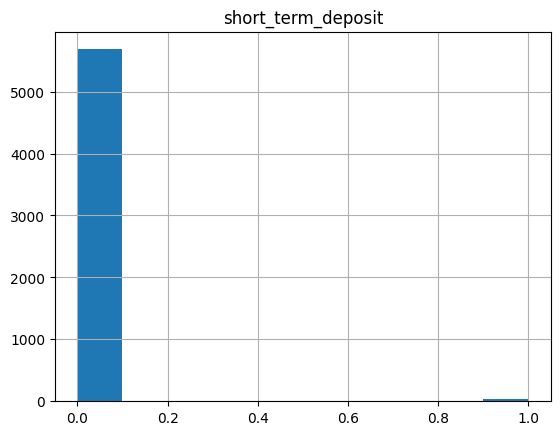

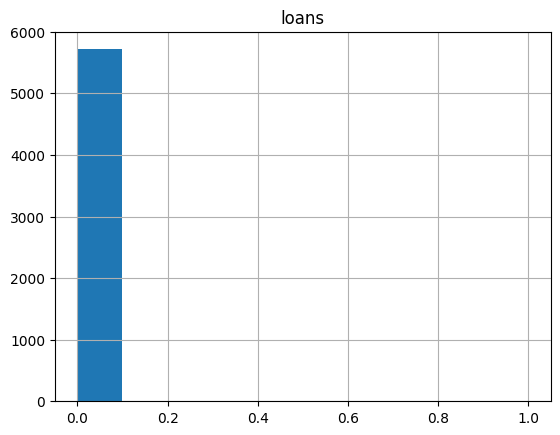

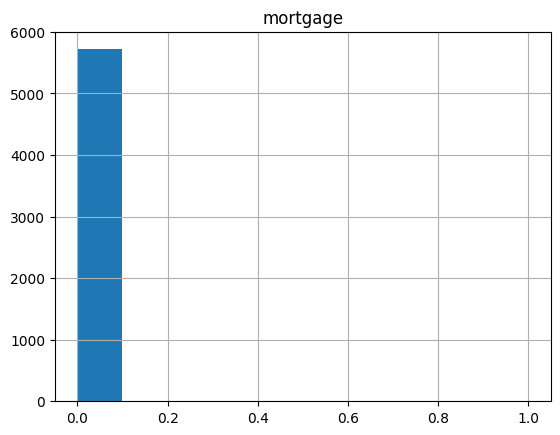

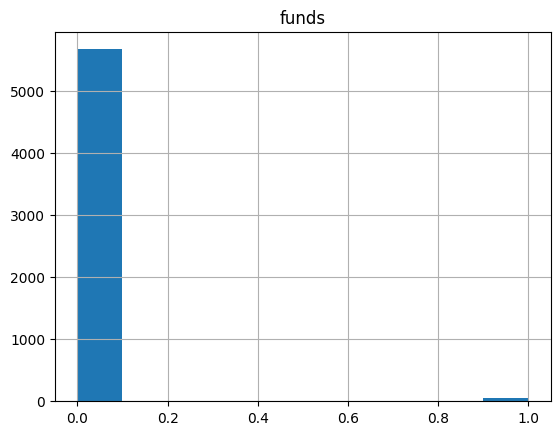

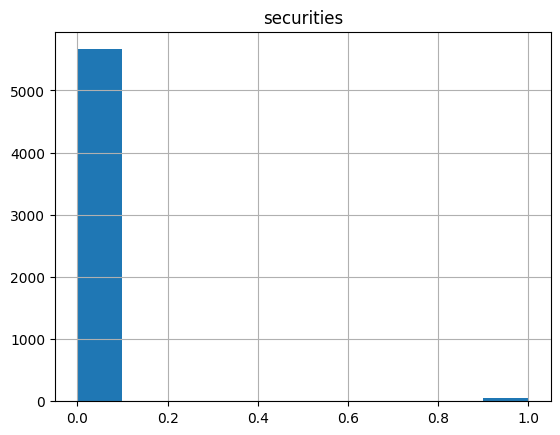

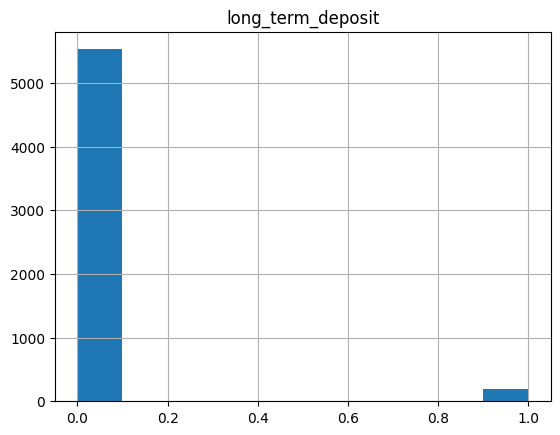

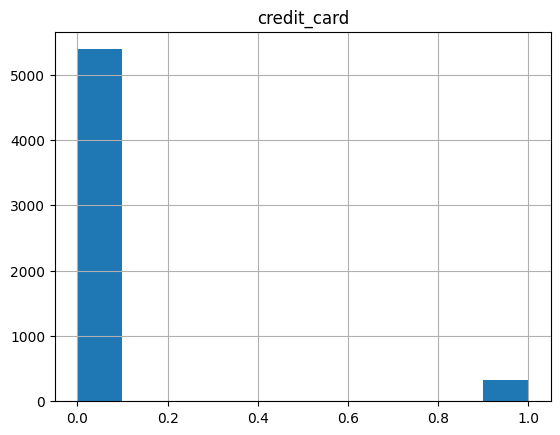

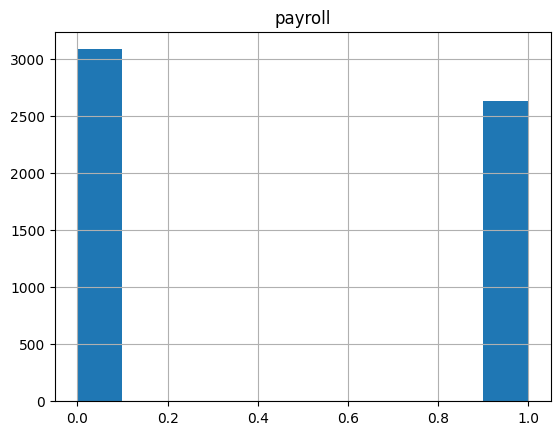

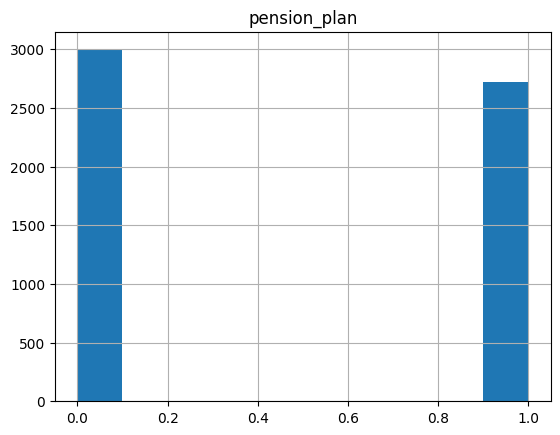

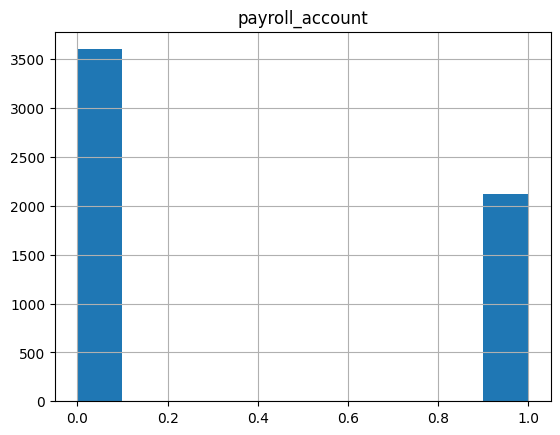

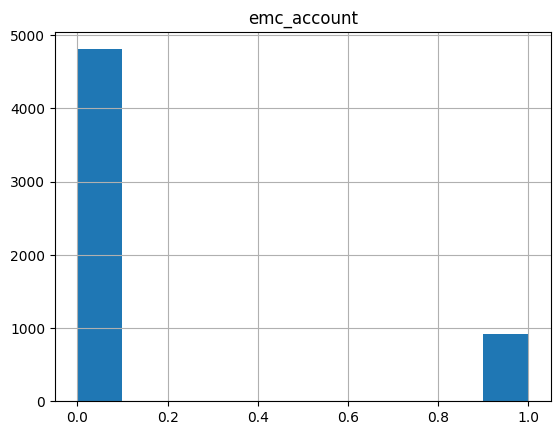

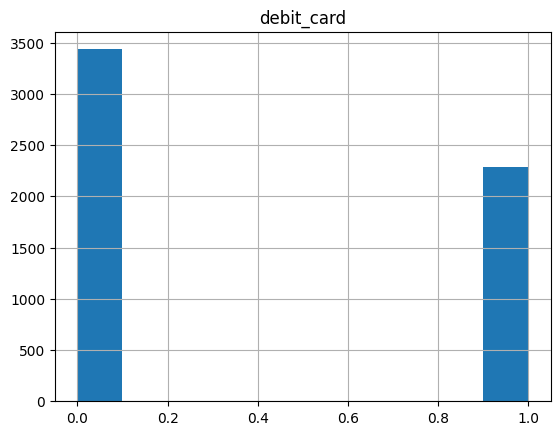

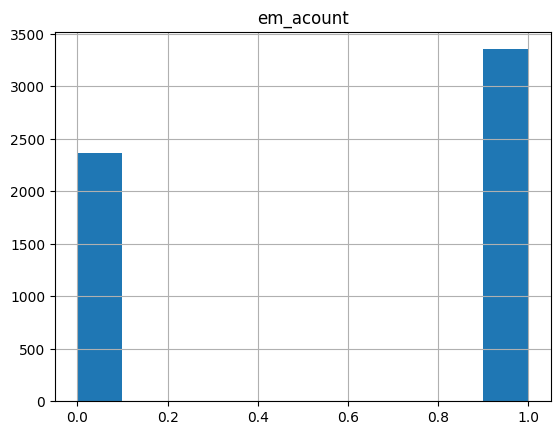

In [158]:
for i in df2:
  if df2[i].dtype.kind == "O":
    print(i,'\n', df2[i].value_counts(), '\n')
  elif (df2[i].dtype.kind=="f") or (df2[i].dtype.kind=="i"):
    print(df2.hist(i))

country_id:
elimino porque practicamnte tiene solo 1 valor

In [159]:
df3= df2.drop(columns=['country_id'], inplace=False)
a_predict3= a_predict2.drop(columns=['country_id'], inplace=False)

entry_chanel: agrupo valores menos frecuentes en others

In [160]:
# Agrupar entry_channel con menor frecuencia,pero analizo en a_predict que es el que tiene mayor numero de registros
print(a_predict3['entry_channel'].value_counts())

entry_channel
KFC    8431
KHE    7521
KHK    6263
KAT    4682
KHM    3670
KHN    3273
KHQ    3247
KHL    1504
KFA    1259
RED    1149
KHO     229
KHF     174
KHD     125
KAZ      56
KHC      50
KBG      19
007      10
KAG       6
013       5
KHP       4
KAS       4
KBZ       3
KAQ       2
KAK       2
KFD       2
KAB       2
KAM       1
KGX       1
KBW       1
KAJ       1
KCB       1
KAY       1
KAF       1
KCH       1
KCK       1
KAA       1
KDR       1
KDT       1
Name: count, dtype: int64


In [161]:
#agrupar los que tienen menos de 1000 registrors en una categoria otros

#Contar las ocurrencias de cada valor en la columna 'entry_channel'
channel_counts = a_predict3['entry_channel'].value_counts()

id_channels_to_group = channel_counts[channel_counts < 1000].index

# Guardar estos canales para usarlos más tarde en df3
id_channels_to_group = list(id_channels_to_group)

# Reemplazar estos valores en df con 'others'
a_predict3['entry_channel'] = a_predict3['entry_channel'].apply(lambda x: 'others' if x in id_channels_to_group else x)

print(a_predict3['entry_channel'].value_counts())

entry_channel
KFC       8431
KHE       7521
KHK       6263
KAT       4682
KHM       3670
KHN       3273
KHQ       3247
KHL       1504
KFA       1259
RED       1149
others     705
Name: count, dtype: int64


In [162]:
# Reemplazar estos valores en df3 con 'others'
df3['entry_channel'] = df3['entry_channel'].apply(lambda x: 'others' if x in id_channels_to_group else x)

print(df3['entry_channel'].value_counts())

entry_channel
KHM       1838
KFC       1328
KHE        675
KAT        600
KHN        341
KHK        275
KHQ        221
RED        153
KFA        141
others      75
KHL         70
KAE          1
Name: count, dtype: int64


In [163]:
#agrego KHL y KAE a la lista de otros
id_channels_to_group.append('KHL')
id_channels_to_group.append('KAE')

a_predict3['entry_channel'] = a_predict3['entry_channel'].apply(lambda x: 'others' if x in id_channels_to_group else x)
df3['entry_channel'] = df3['entry_channel'].apply(lambda x: 'others' if x in id_channels_to_group else x)


In [164]:
# Verificar la agrupación
print(df3['entry_channel'].value_counts(), '\n', '\n', a_predict3['entry_channel'].value_counts())

entry_channel
KHM       1838
KFC       1328
KHE        675
KAT        600
KHN        341
KHK        275
KHQ        221
RED        153
others     146
KFA        141
Name: count, dtype: int64 
 
 entry_channel
KFC       8431
KHE       7521
KHK       6263
KAT       4682
KHM       3670
KHN       3273
KHQ       3247
others    2209
KFA       1259
RED       1149
Name: count, dtype: int64


region_code: agrupo valores menos frecuentes en others

In [165]:
#convierto region_code en categorica
df3['region_code'] = df3['region_code'].astype('category')
a_predict3['region_code'] = a_predict3['region_code'].astype('category')

In [166]:
# Agrupar entry_charegion_code en  a_predict que es el que tiene mayor numero de registros
a_predict3['region_code'].value_counts()

region_code
28.0    12521
8.0      3488
46.0     2536
41.0     2042
3.0      1457
30.0     1339
29.0     1206
15.0     1143
47.0      967
11.0      918
50.0      871
33.0      808
36.0      801
35.0      800
18.0      743
45.0      734
37.0      575
39.0      537
2.0       517
14.0      516
13.0      510
6.0       482
12.0      423
9.0       396
7.0       395
21.0      371
24.0      362
38.0      340
4.0       335
10.0      324
23.0      291
43.0      286
26.0      273
19.0      249
27.0      244
32.0      240
17.0      233
49.0      206
25.0      200
34.0      200
16.0      196
40.0      167
5.0       164
22.0      116
42.0       66
44.0       55
51.0       32
52.0       23
48.0        4
31.0        2
Name: count, dtype: int64

In [167]:
# Contar las ocurrencias de cada valor en la columna 'region_code'
region_code_counts = a_predict3['region_code'].value_counts()

# Identificar los region_code con menos de 600 registros
id_region_code_to_group = region_code_counts[region_code_counts < 300].index

# Guardar estos region_code para usarlos más tarde en a_predict3
id_region_code_to_group = list(id_region_code_to_group)

# Reemplazar estos valores en df con 'others'
a_predict3['region_code'] = a_predict3['region_code'].apply(lambda x: 'others' if x in id_region_code_to_group else x)

print(a_predict3['region_code'].value_counts())

region_code
28.0      12521
8.0        3488
others     3247
46.0       2536
41.0       2042
3.0        1457
30.0       1339
29.0       1206
15.0       1143
47.0        967
11.0        918
50.0        871
33.0        808
36.0        801
35.0        800
18.0        743
45.0        734
37.0        575
39.0        537
2.0         517
14.0        516
13.0        510
6.0         482
12.0        423
9.0         396
7.0         395
21.0        371
24.0        362
38.0        340
4.0         335
10.0        324
Name: count, dtype: int64


In [168]:
# Reemplazar estos valores en df4 con 'others'
df3['region_code'] = df3['region_code'].apply(lambda x: 'others' if x in id_region_code_to_group else x)

print(df3['region_code'].value_counts())

region_code
28.0      1499
others     497
8.0        462
46.0       400
3.0        248
30.0       246
41.0       241
15.0       183
29.0       155
35.0       149
50.0       125
11.0       115
33.0       114
36.0       111
47.0       109
45.0        99
7.0         89
39.0        89
37.0        84
2.0         81
6.0         71
14.0        70
18.0        69
12.0        68
13.0        53
21.0        50
9.0         44
4.0         43
10.0        41
24.0        40
38.0        29
20.0        25
1.0         19
Name: count, dtype: int64


In [169]:
#agrego 13.0, 21.0, 9.0, 4.0, 10.0, 24.0, 38.0, 20.0, 1.0 a la lista de otros
id_region_code_to_group.append(13.0)
id_region_code_to_group.append(21.0)
id_region_code_to_group.append(9.0)
id_region_code_to_group.append(4.0)
id_region_code_to_group.append(10.0)
id_region_code_to_group.append(24.0)
id_region_code_to_group.append(38.0)
id_region_code_to_group.append(20.0)
id_region_code_to_group.append(1.0)

a_predict3['region_code'] = a_predict3['region_code'].apply(lambda x: 'others' if x in id_region_code_to_group else x)
df3['region_code'] = df3['region_code'].apply(lambda x: 'others' if x in id_region_code_to_group else x)

print(df3['region_code'].value_counts(), '\n', '\n', a_predict3['region_code'].value_counts())

region_code
28.0      1499
others     841
8.0        462
46.0       400
3.0        248
30.0       246
41.0       241
15.0       183
29.0       155
35.0       149
50.0       125
11.0       115
33.0       114
36.0       111
47.0       109
45.0        99
39.0        89
7.0         89
37.0        84
2.0         81
6.0         71
14.0        70
18.0        69
12.0        68
Name: count, dtype: int64 
 
 region_code
28.0      12521
others     5885
8.0        3488
46.0       2536
41.0       2042
3.0        1457
30.0       1339
29.0       1206
15.0       1143
47.0        967
11.0        918
50.0        871
33.0        808
36.0        801
35.0        800
18.0        743
45.0        734
37.0        575
39.0        537
2.0         517
14.0        516
6.0         482
12.0        423
7.0         395
Name: count, dtype: int64


## 7. Codificación de Variables Categóricas

Utilizamos codificación one-hot para transformar las variables categóricas en variables numéricas que puedan ser interpretadas por los modelos de machine learning.

In [170]:
df4=df3.copy()
df4=pd.get_dummies(data=df4, columns=['gender'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region_code         5718 non-null   object 
 1   age                 5718 non-null   int64  
 2   salary              5718 non-null   float64
 3   entry_channel       5718 non-null   object 
 4   segment             5718 non-null   object 
 5   short_term_deposit  5718 non-null   int64  
 6   loans               5718 non-null   int64  
 7   mortgage            5718 non-null   int64  
 8   funds               5718 non-null   int64  
 9   securities          5718 non-null   int64  
 10  long_term_deposit   5718 non-null   int64  
 11  credit_card         5718 non-null   int64  
 12  payroll             5718 non-null   int64  
 13  pension_plan        5718 non-null   int64  
 14  payroll_account     5718 non-null   int64  
 15  emc_account         5718 non-null   int64  
 16  debit_

In [171]:
a_predict4=a_predict3.copy()
a_predict4=pd.get_dummies(data=a_predict4, columns=['gender'])
a_predict4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41704 entries, 17457 to 1454613
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region_code         41704 non-null  object 
 1   age                 41704 non-null  int64  
 2   salary              41704 non-null  float64
 3   entry_channel       41704 non-null  object 
 4   segment             41704 non-null  object 
 5   short_term_deposit  41704 non-null  int64  
 6   loans               41704 non-null  int64  
 7   mortgage            41704 non-null  int64  
 8   funds               41704 non-null  int64  
 9   securities          41704 non-null  int64  
 10  long_term_deposit   41704 non-null  int64  
 11  credit_card         41704 non-null  int64  
 12  payroll             41704 non-null  int64  
 13  pension_plan        41704 non-null  int64  
 14  payroll_account     41704 non-null  int64  
 15  emc_account         41704 non-null  int64  
 16  deb

In [172]:
df4['entry_channel'].value_counts()

entry_channel
KHM       1838
KFC       1328
KHE        675
KAT        600
KHN        341
KHK        275
KHQ        221
RED        153
others     146
KFA        141
Name: count, dtype: int64

In [173]:
df4['segment'].value_counts()

segment
02 - PARTICULARES     4119
03 - UNIVERSITARIO    1417
01 - TOP               182
Name: count, dtype: int64

In [174]:
df4['region_code'].value_counts()

region_code
28.0      1499
others     841
8.0        462
46.0       400
3.0        248
30.0       246
41.0       241
15.0       183
29.0       155
35.0       149
50.0       125
11.0       115
33.0       114
36.0       111
47.0       109
45.0        99
39.0        89
7.0         89
37.0        84
2.0         81
6.0         71
14.0        70
18.0        69
12.0        68
Name: count, dtype: int64

In [175]:
df4=pd.get_dummies(data=df4, columns=['entry_channel'])
df4=pd.get_dummies(data=df4, columns=['segment'])
df4=pd.get_dummies(data=df4, columns=['region_code'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         5718 non-null   int64  
 1   salary                      5718 non-null   float64
 2   short_term_deposit          5718 non-null   int64  
 3   loans                       5718 non-null   int64  
 4   mortgage                    5718 non-null   int64  
 5   funds                       5718 non-null   int64  
 6   securities                  5718 non-null   int64  
 7   long_term_deposit           5718 non-null   int64  
 8   credit_card                 5718 non-null   int64  
 9   payroll                     5718 non-null   int64  
 10  pension_plan                5718 non-null   int64  
 11  payroll_account             5718 non-null   int64  
 12  emc_account                 5718 non-null   int64  
 13  debit_card                  5718 

In [176]:
a_predict4=pd.get_dummies(data=a_predict4, columns=['entry_channel'])
a_predict4=pd.get_dummies(data=a_predict4, columns=['segment'])
a_predict4=pd.get_dummies(data=a_predict4, columns=['region_code'])
a_predict4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41704 entries, 17457 to 1454613
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         41704 non-null  int64  
 1   salary                      41704 non-null  float64
 2   short_term_deposit          41704 non-null  int64  
 3   loans                       41704 non-null  int64  
 4   mortgage                    41704 non-null  int64  
 5   funds                       41704 non-null  int64  
 6   securities                  41704 non-null  int64  
 7   long_term_deposit           41704 non-null  int64  
 8   credit_card                 41704 non-null  int64  
 9   payroll                     41704 non-null  int64  
 10  pension_plan                41704 non-null  int64  
 11  payroll_account             41704 non-null  int64  
 12  emc_account                 41704 non-null  int64  
 13  debit_card                  41

## 8. Análisis de Correlación y Transformaciones

Realizamos un análisis de correlación y aplicamos transformaciones a las variables numéricas para mejorar el rendimiento del modelo.

In [177]:
corr = df4.corr()
corr.style.background_gradient(cmap='coolwarm')

In [178]:
df5= df4.drop(columns=['payroll','payroll_account'], inplace=False)
a_predict5= a_predict4.drop(columns=['payroll','payroll_account'], inplace=False)

In [179]:
plt.figure(figsize=(40,15))
corr = df5.corr()
corr.style.background_gradient(cmap='coolwarm').format("{:.3f}")


<Figure size 4000x1500 with 0 Axes>

In [180]:
# Comparar target vs features
target=["pension_plan"]
features= df5.columns.drop(target)

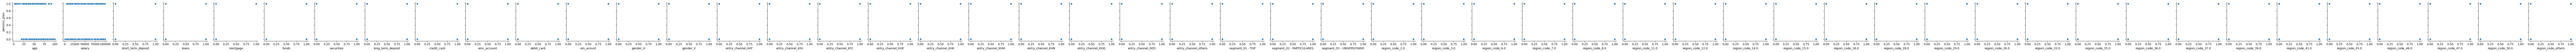

In [181]:
sns.pairplot(df5,x_vars=features, y_vars=target)
plt.show()

In [182]:
# se ve que nadie que tenga  mortgage tiene pension_plan, analizo si dejo o saco
correlation = df5['mortgage'].corr(df5['pension_plan'])
print(correlation)


0.01965191101398799


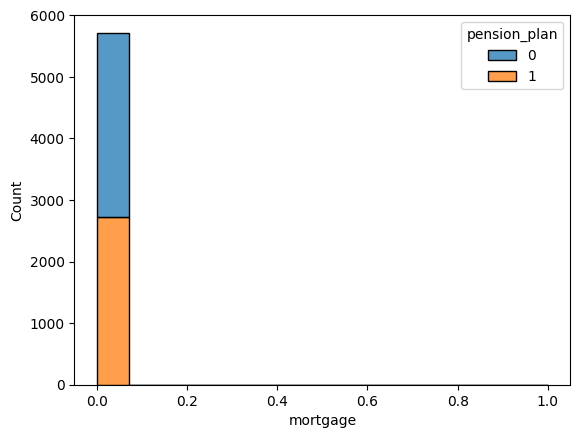

In [183]:
import seaborn as sns
sns.histplot(data=df5, x='mortgage', hue='pension_plan', multiple='stack')
plt.show()


In [184]:
#la elimino
df5= df5.drop(columns=['mortgage'], inplace=False)
a_predict5= a_predict5.drop(columns=['mortgage'], inplace=False)

features=features.drop('mortgage')

In [185]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         5718 non-null   int64  
 1   salary                      5718 non-null   float64
 2   short_term_deposit          5718 non-null   int64  
 3   loans                       5718 non-null   int64  
 4   funds                       5718 non-null   int64  
 5   securities                  5718 non-null   int64  
 6   long_term_deposit           5718 non-null   int64  
 7   credit_card                 5718 non-null   int64  
 8   pension_plan                5718 non-null   int64  
 9   emc_account                 5718 non-null   int64  
 10  debit_card                  5718 non-null   int64  
 11  em_acount                   5718 non-null   int64  
 12  gender_H                    5718 non-null   bool   
 13  gender_V                    5718 

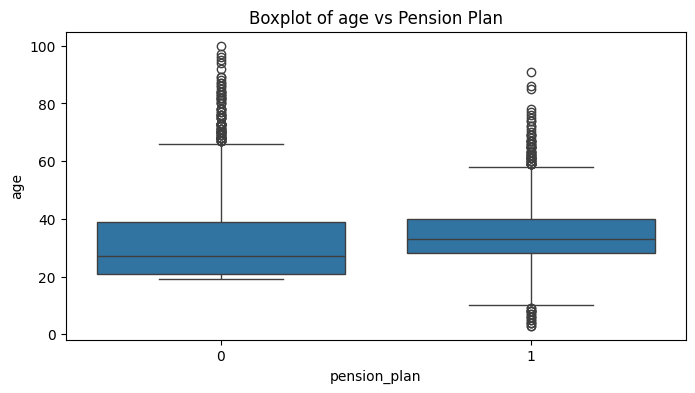

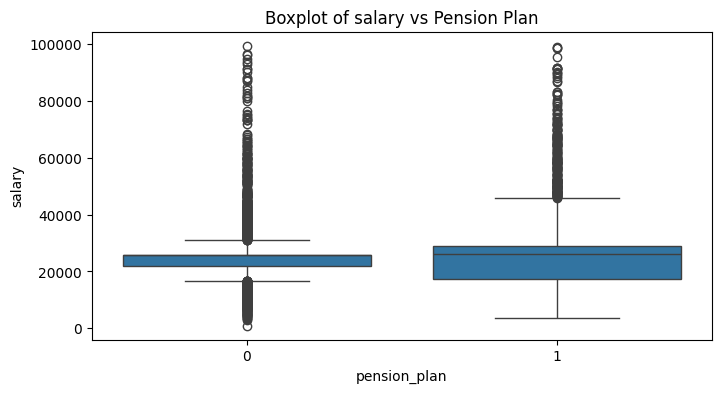

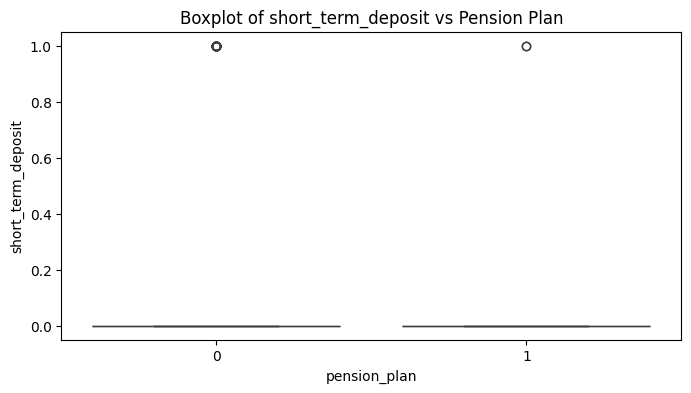

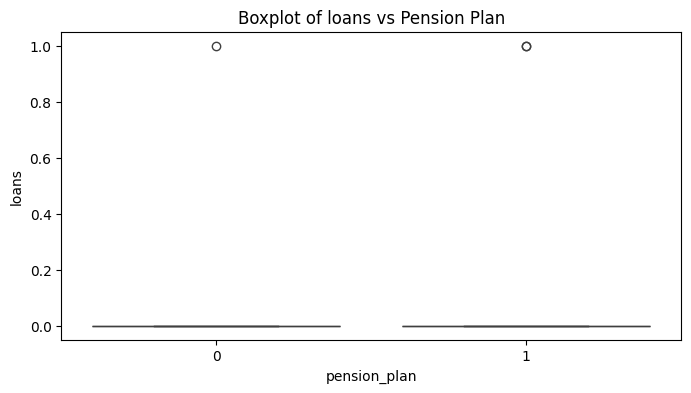

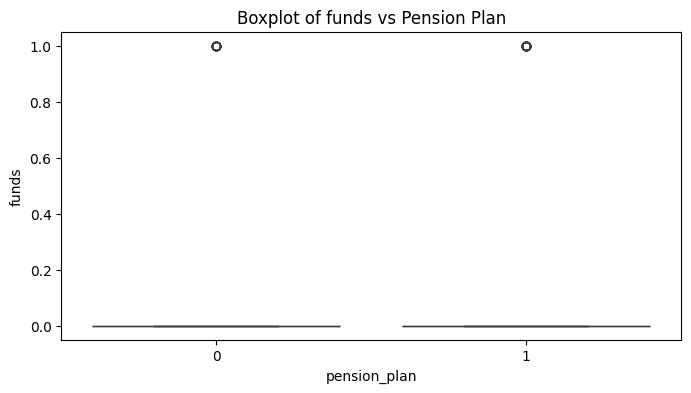

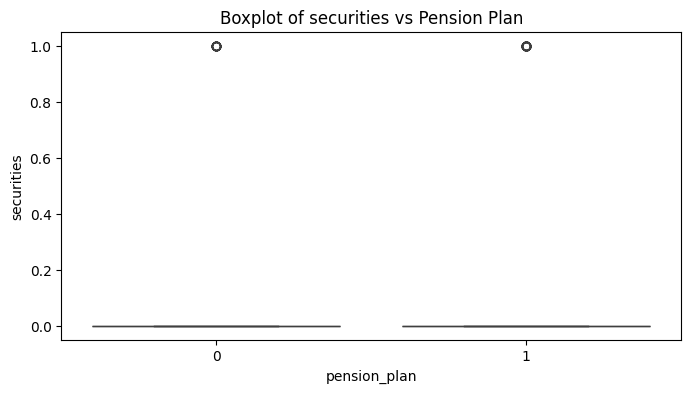

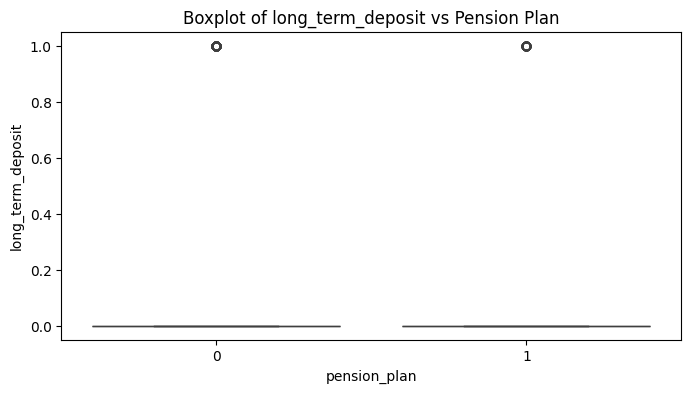

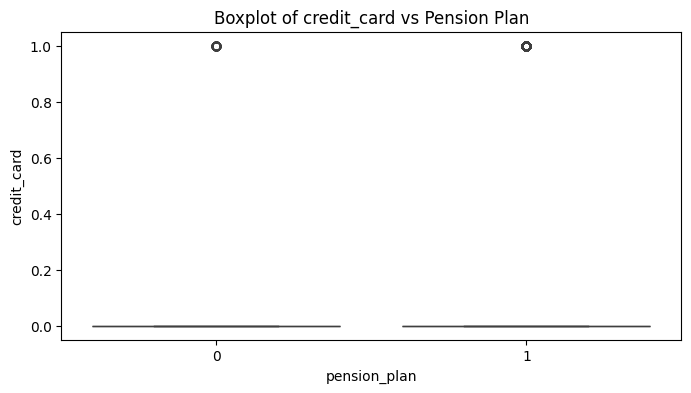

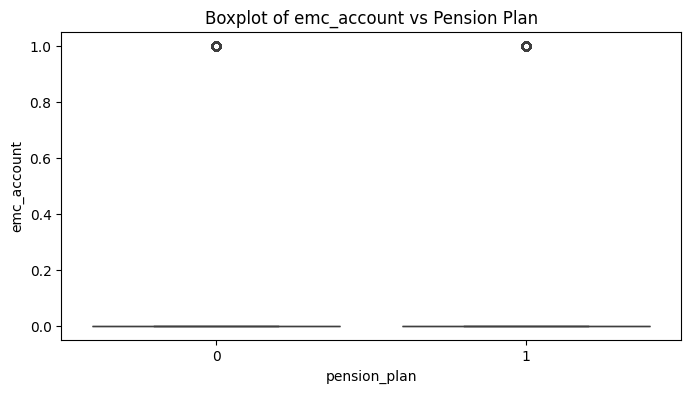

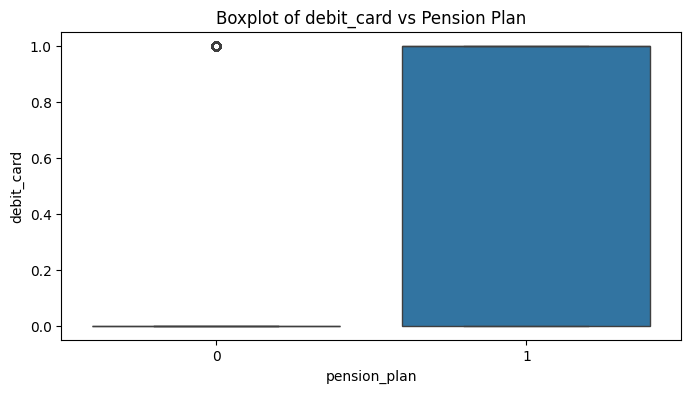

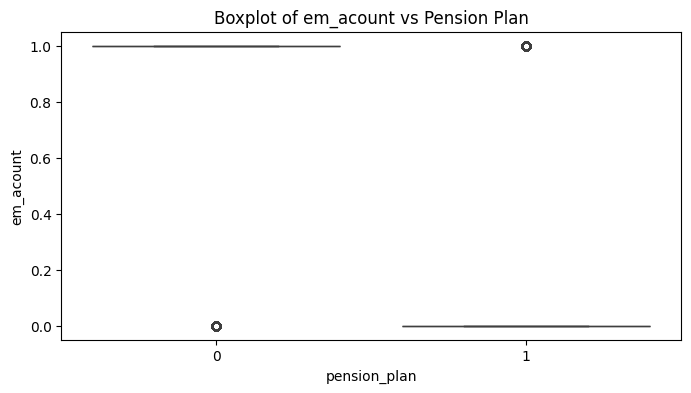

In [186]:

# Variables numéricas
numeric_vars = ['age', 'salary', 'short_term_deposit', 'loans', 'funds', 'securities',
                'long_term_deposit', 'credit_card', 'emc_account', 'debit_card', 'em_acount']

# Variables categóricas
categorical_vars = ['gender_H', 'gender_V', 'entry_channel_KAT', 'entry_channel_KFA',
                    'entry_channel_KFC', 'entry_channel_KHE', 'entry_channel_KHK',
                    'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KHQ',
                    'entry_channel_RED', 'entry_channel_others', 'segment_01 - TOP',
                    'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO',
                    'region_code_2.0', 'region_code_3.0', 'region_code_6.0',
                    'region_code_7.0', 'region_code_8.0', 'region_code_11.0',
                    'region_code_12.0', 'region_code_14.0', 'region_code_15.0',
                    'region_code_18.0', 'region_code_28.0', 'region_code_29.0',
                    'region_code_30.0', 'region_code_33.0', 'region_code_35.0',
                    'region_code_36.0', 'region_code_37.0', 'region_code_39.0',
                    'region_code_41.0', 'region_code_45.0', 'region_code_46.0',
                    'region_code_47.0', 'region_code_50.0', 'region_code_others']

# Crear gráficos para las variables numéricas
for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='pension_plan', y=var, data=df5)
    plt.title(f'Boxplot of {var} vs Pension Plan')
    plt.show()


In [187]:
#Evaluar si son significativas
numeric_vars_a_elim = ['short_term_deposit', 'loans', 'funds', 'securities',
                'long_term_deposit', 'credit_card', 'emc_account', 'debit_card', 'em_acount']

for i in numeric_vars_a_elim:
  print(df5[i].value_counts(), '\n')


short_term_deposit
0    5683
1      35
Name: count, dtype: int64 

loans
0    5715
1       3
Name: count, dtype: int64 

funds
0    5672
1      46
Name: count, dtype: int64 

securities
0    5663
1      55
Name: count, dtype: int64 

long_term_deposit
0    5527
1     191
Name: count, dtype: int64 

credit_card
0    5389
1     329
Name: count, dtype: int64 

emc_account
0    4805
1     913
Name: count, dtype: int64 

debit_card
0    3434
1    2284
Name: count, dtype: int64 

em_acount
1    3352
0    2366
Name: count, dtype: int64 



In [188]:
# las variables que estan muy desequilibradas las vamos a eliminar
vars_a_elim=['short_term_deposit', 'loans', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'emc_account']

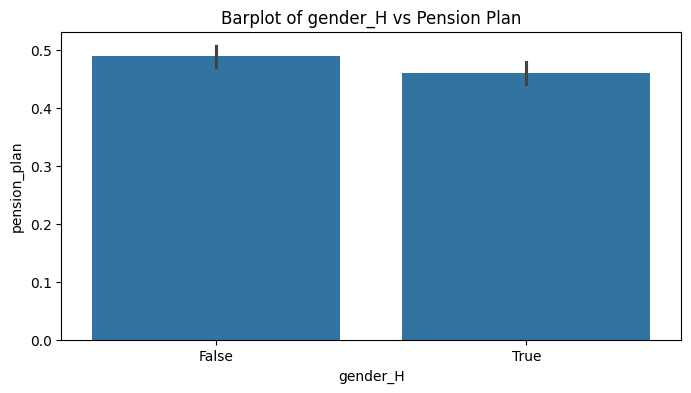

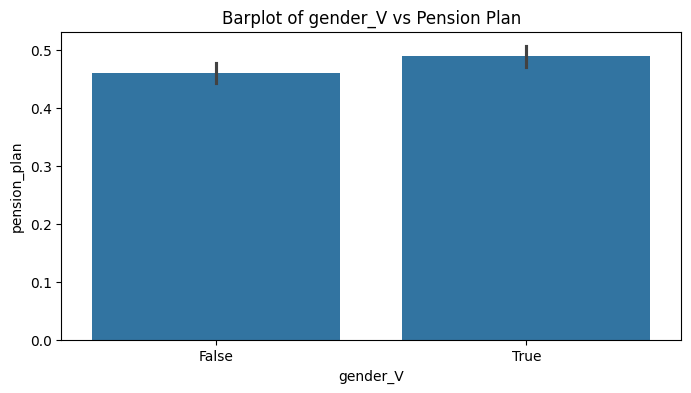

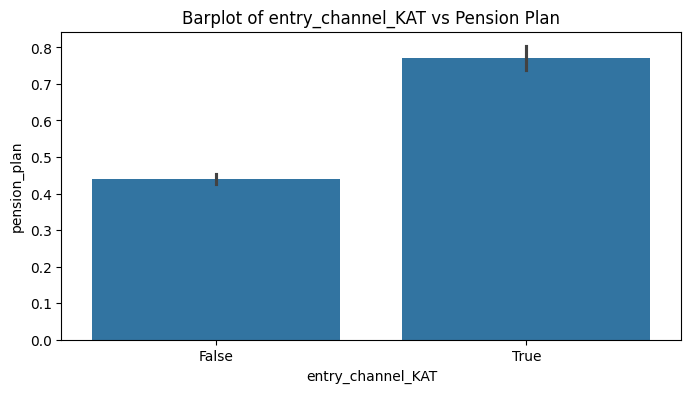

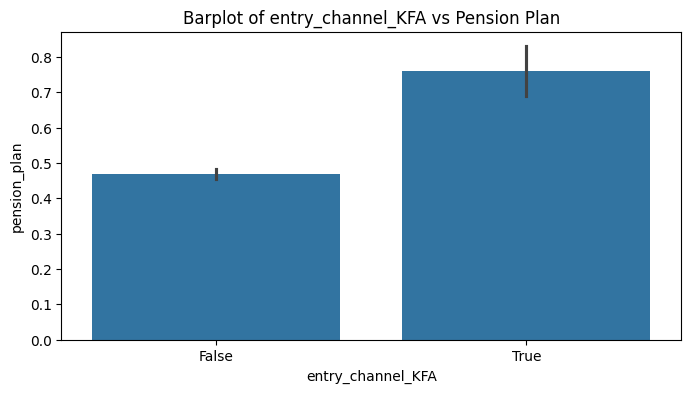

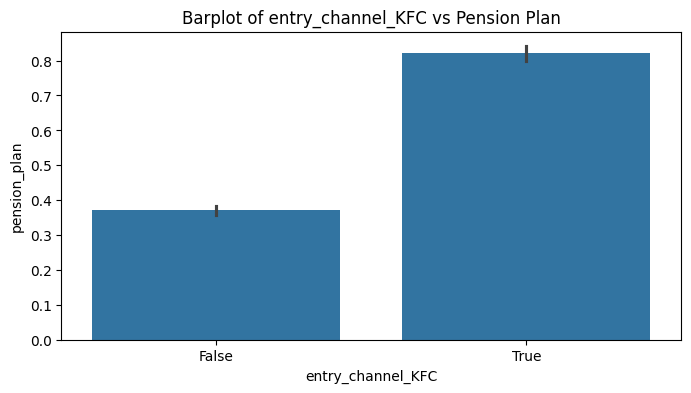

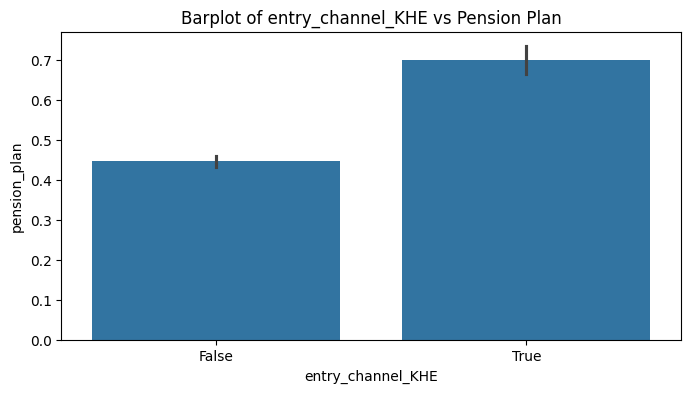

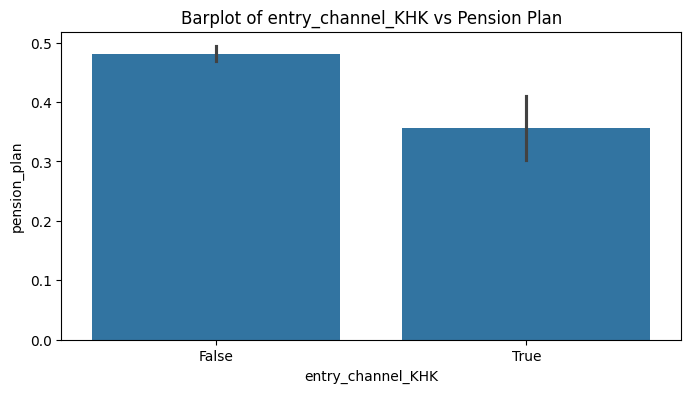

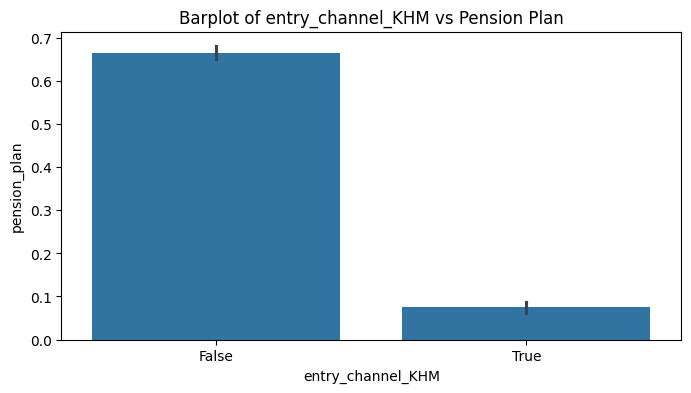

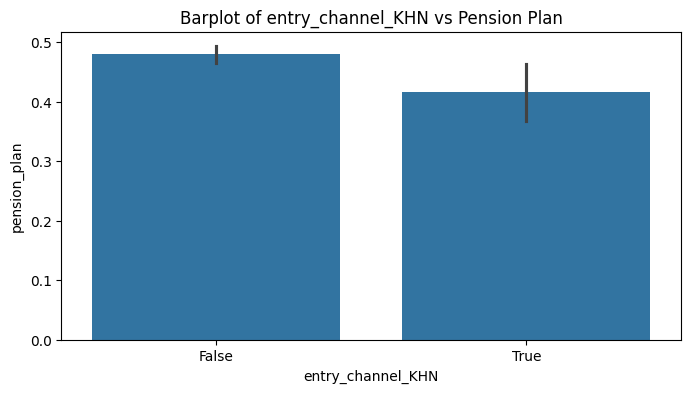

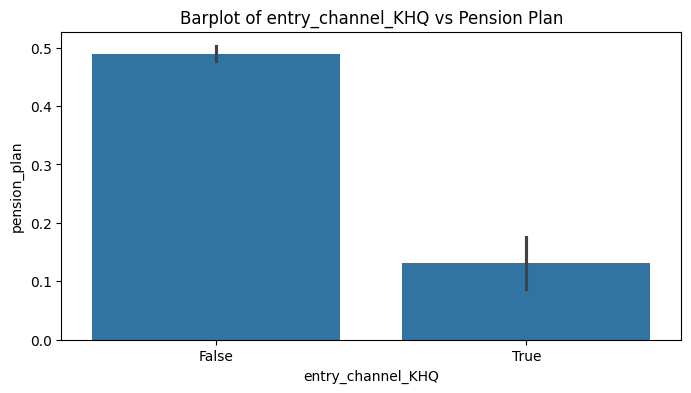

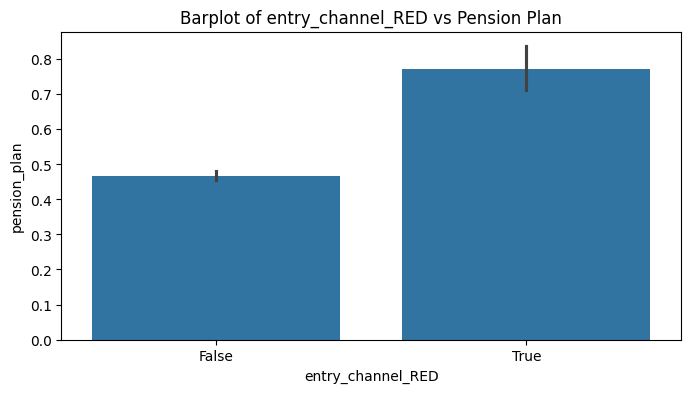

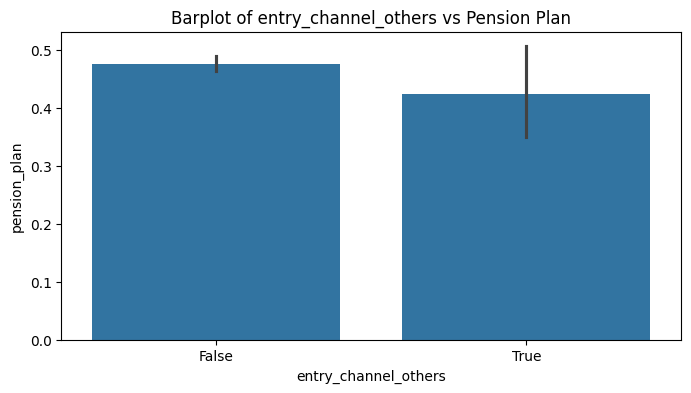

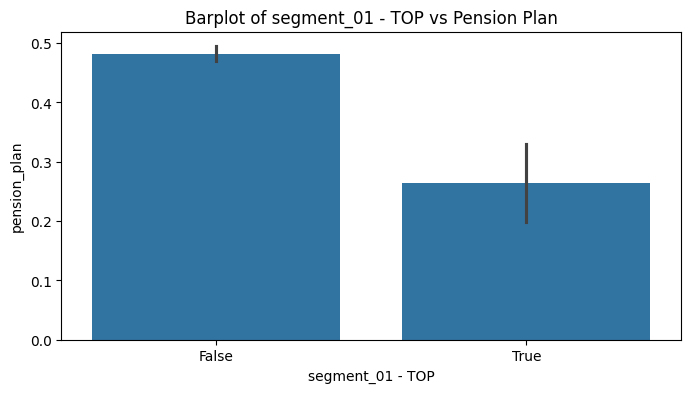

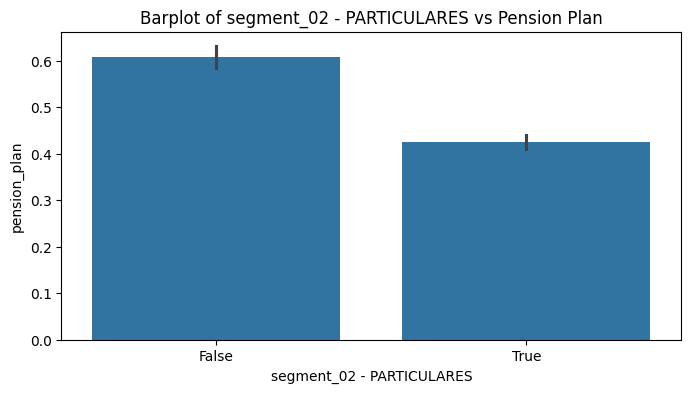

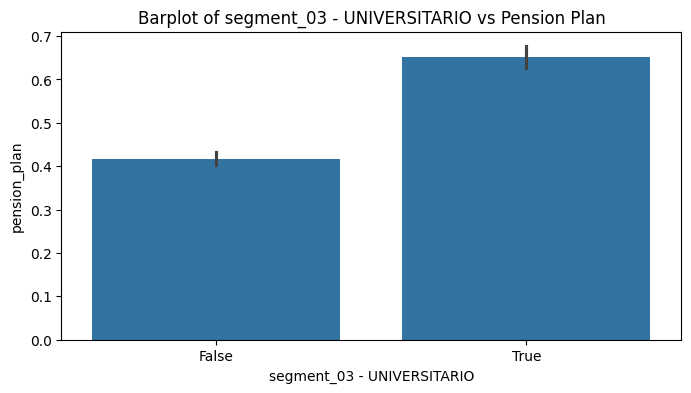

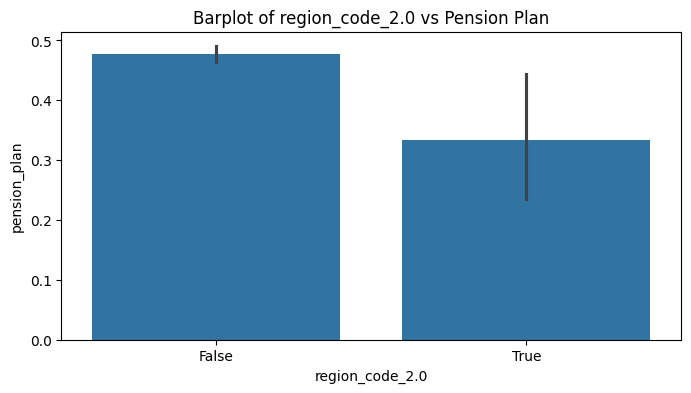

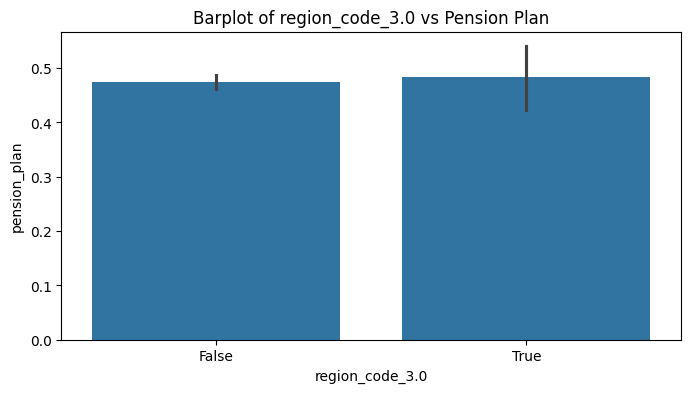

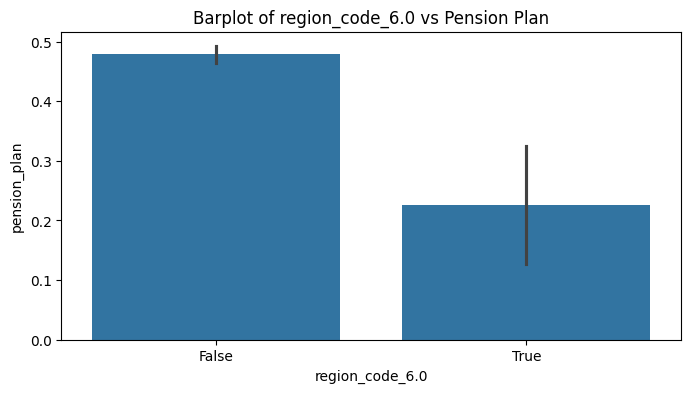

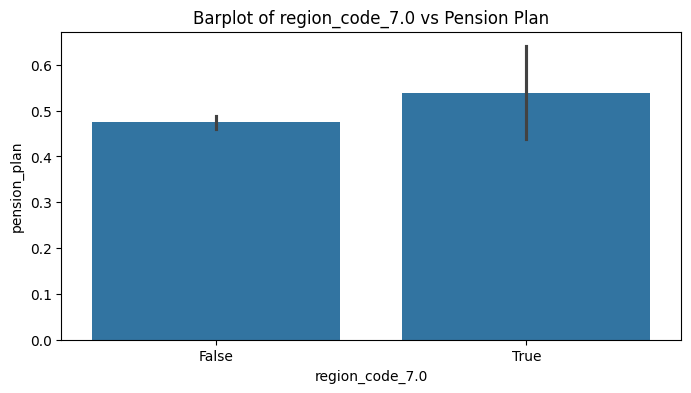

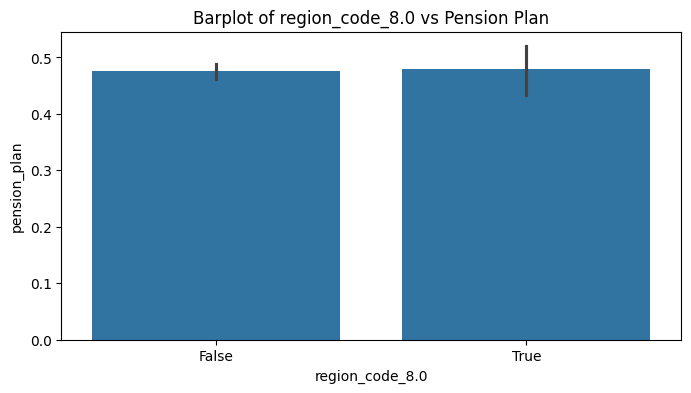

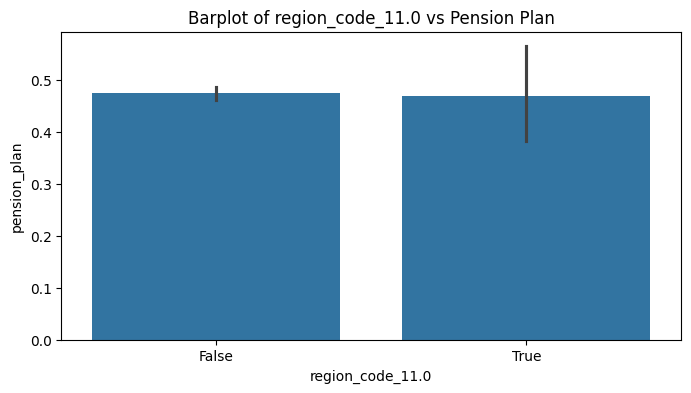

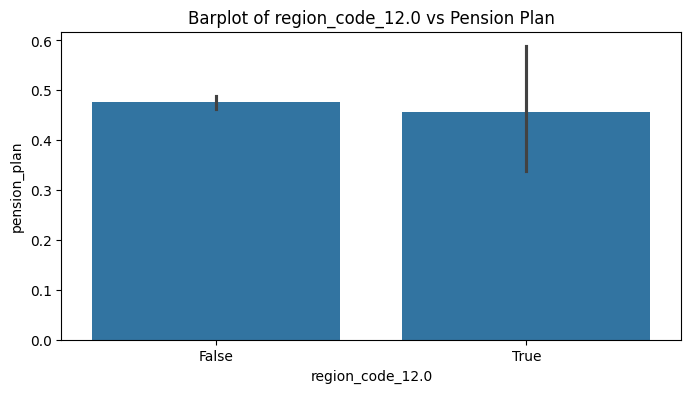

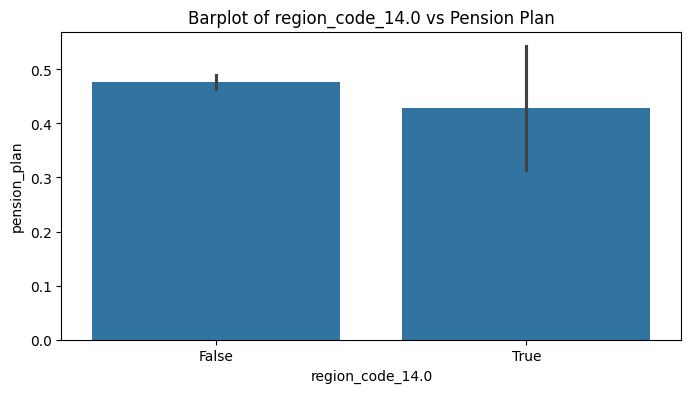

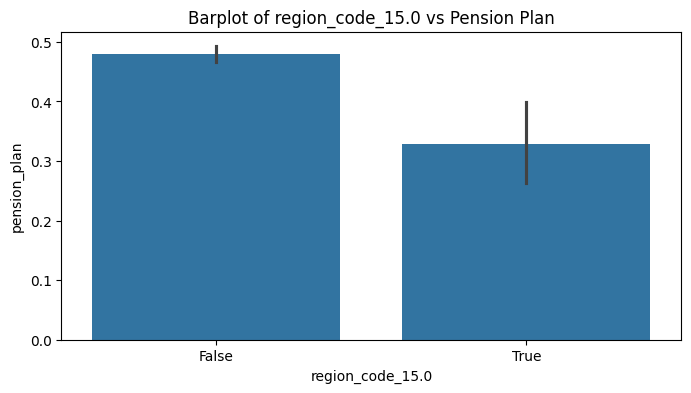

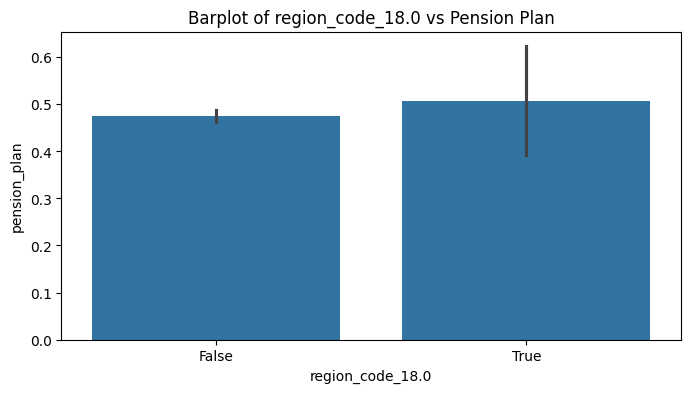

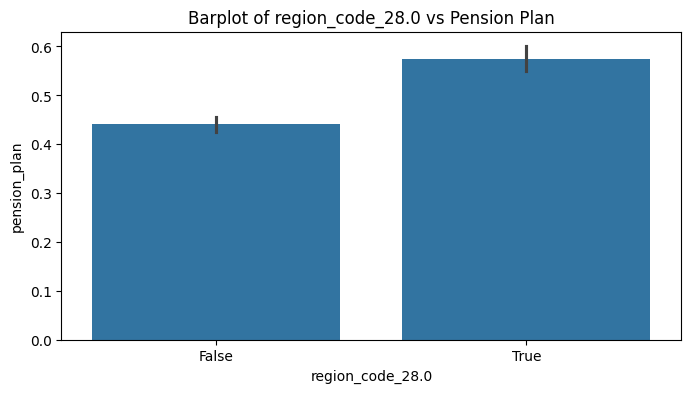

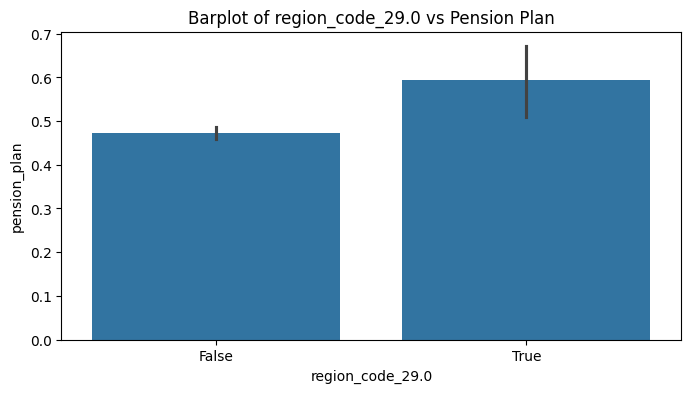

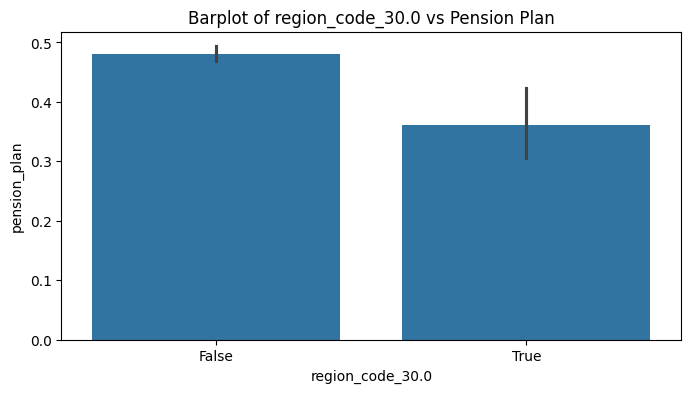

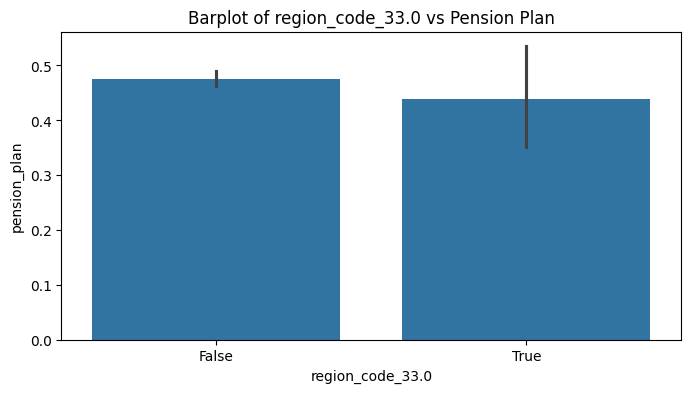

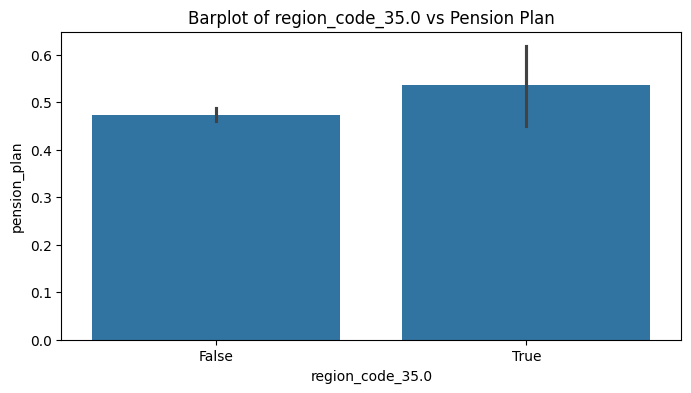

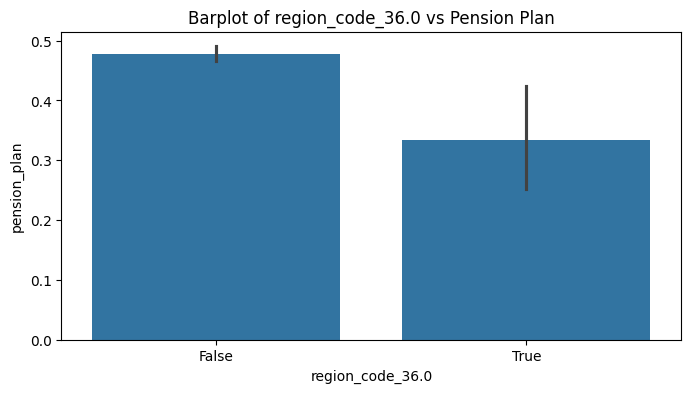

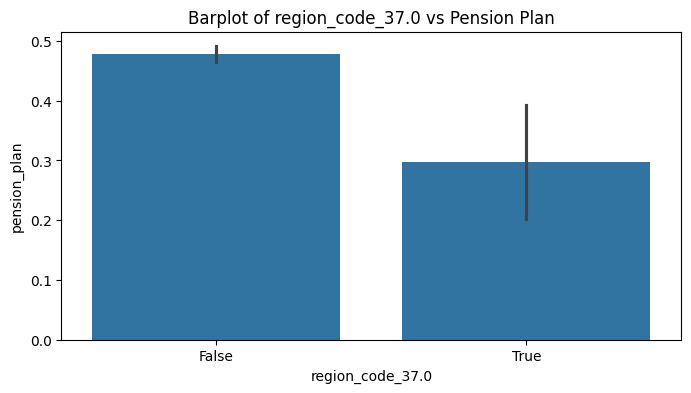

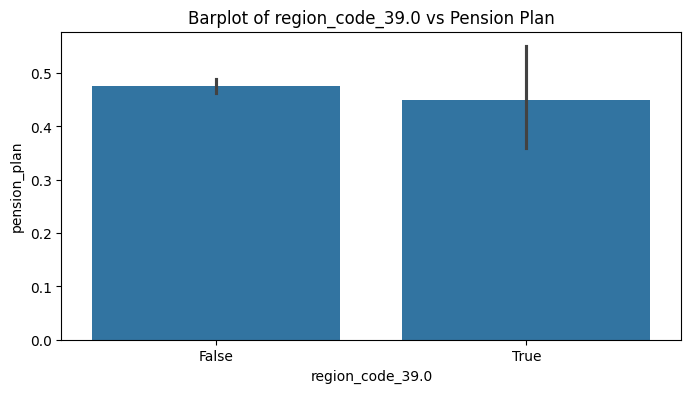

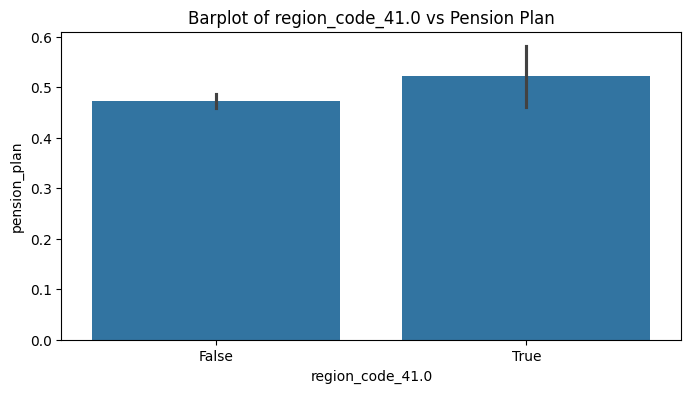

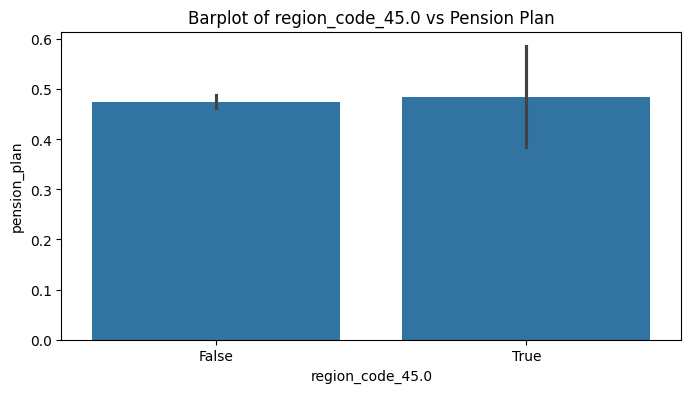

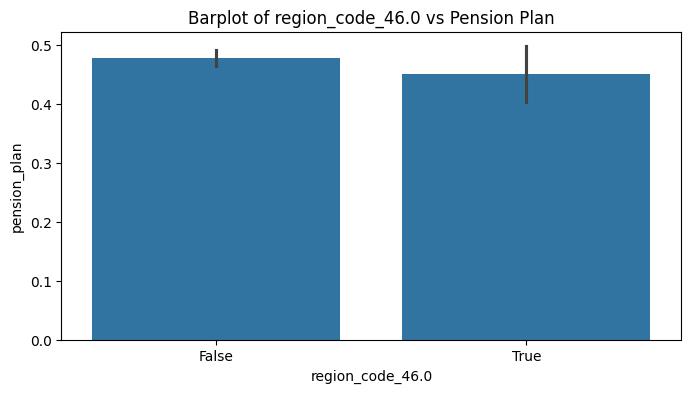

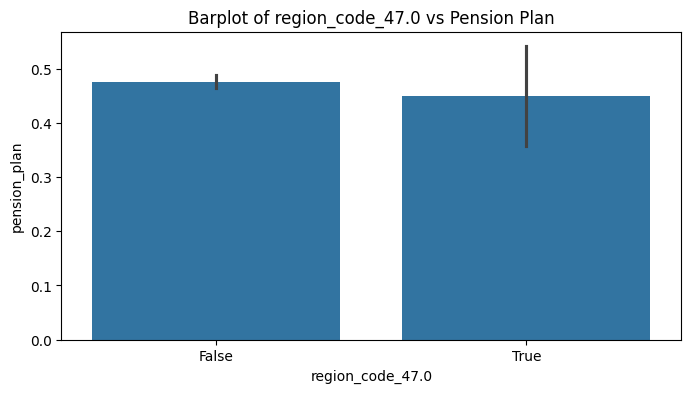

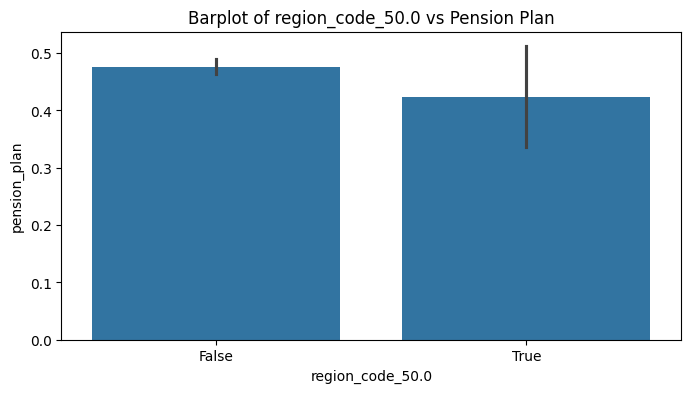

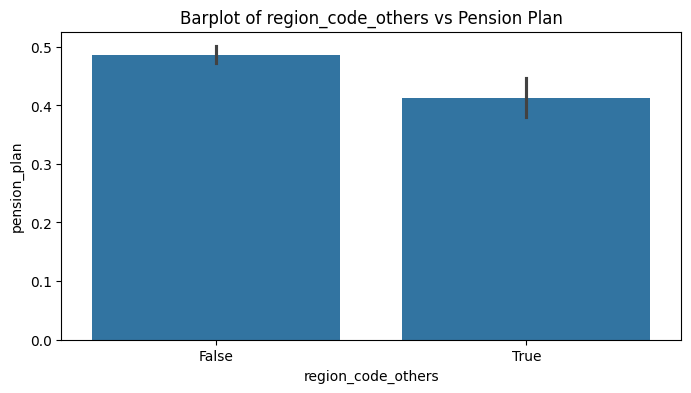

In [189]:
# Crear gráficos para las variables categóricas
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=var, y='pension_plan', data=df5)
    plt.title(f'Barplot of {var} vs Pension Plan')
    plt.show()

In [190]:
vars_a_elim.append('entry_channel_KHM')

Analizo si salay y age estan muy correlacionadas

<ipython-input-191-b83a34c576b6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="pension_plan", y='salary', data=df5, palette="Wistia")


<Axes: xlabel='pension_plan', ylabel='salary'>

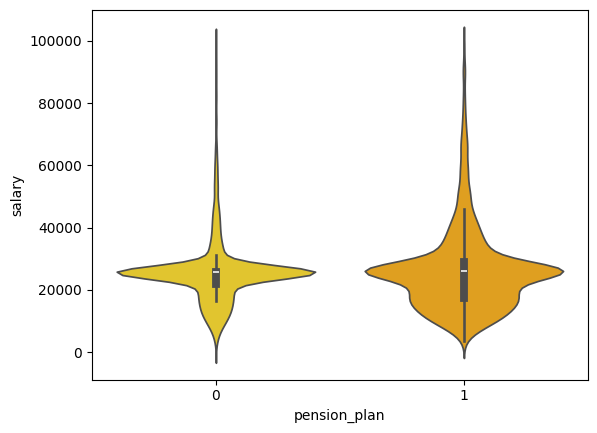

In [191]:
sns.violinplot(x="pension_plan", y='salary', data=df5, palette="Wistia")

In [192]:
df5 = df5[df5['salary'] <= 65000]
df5.shape

(5608, 51)

In [193]:
a_predict5 = a_predict5[a_predict5['salary'] <= 65000]
a_predict5.shape

(40309, 51)

<ipython-input-194-f23b6018d3b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="pension_plan", y='age', data=df5, palette="Wistia")


<Axes: xlabel='pension_plan', ylabel='age'>

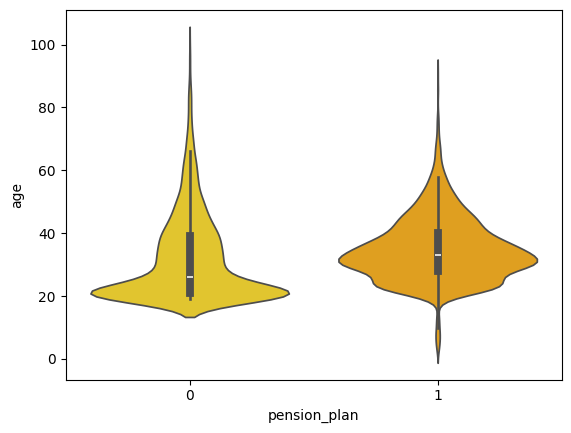

In [194]:
sns.violinplot(x="pension_plan", y='age', data=df5, palette="Wistia")

In [195]:
df5 = df5[df5['age'] >= 18]
df5.shape

(5579, 51)

In [196]:
df5['age'].min()

19

In [197]:
a_predict5 = a_predict5[a_predict5['age'] >= 18]
a_predict5.shape

(40309, 51)

In [198]:
#elimino de mi dataset

df5= df5.drop(columns=vars_a_elim, inplace=False)
a_predict5= a_predict5.drop(columns=vars_a_elim, inplace=False)

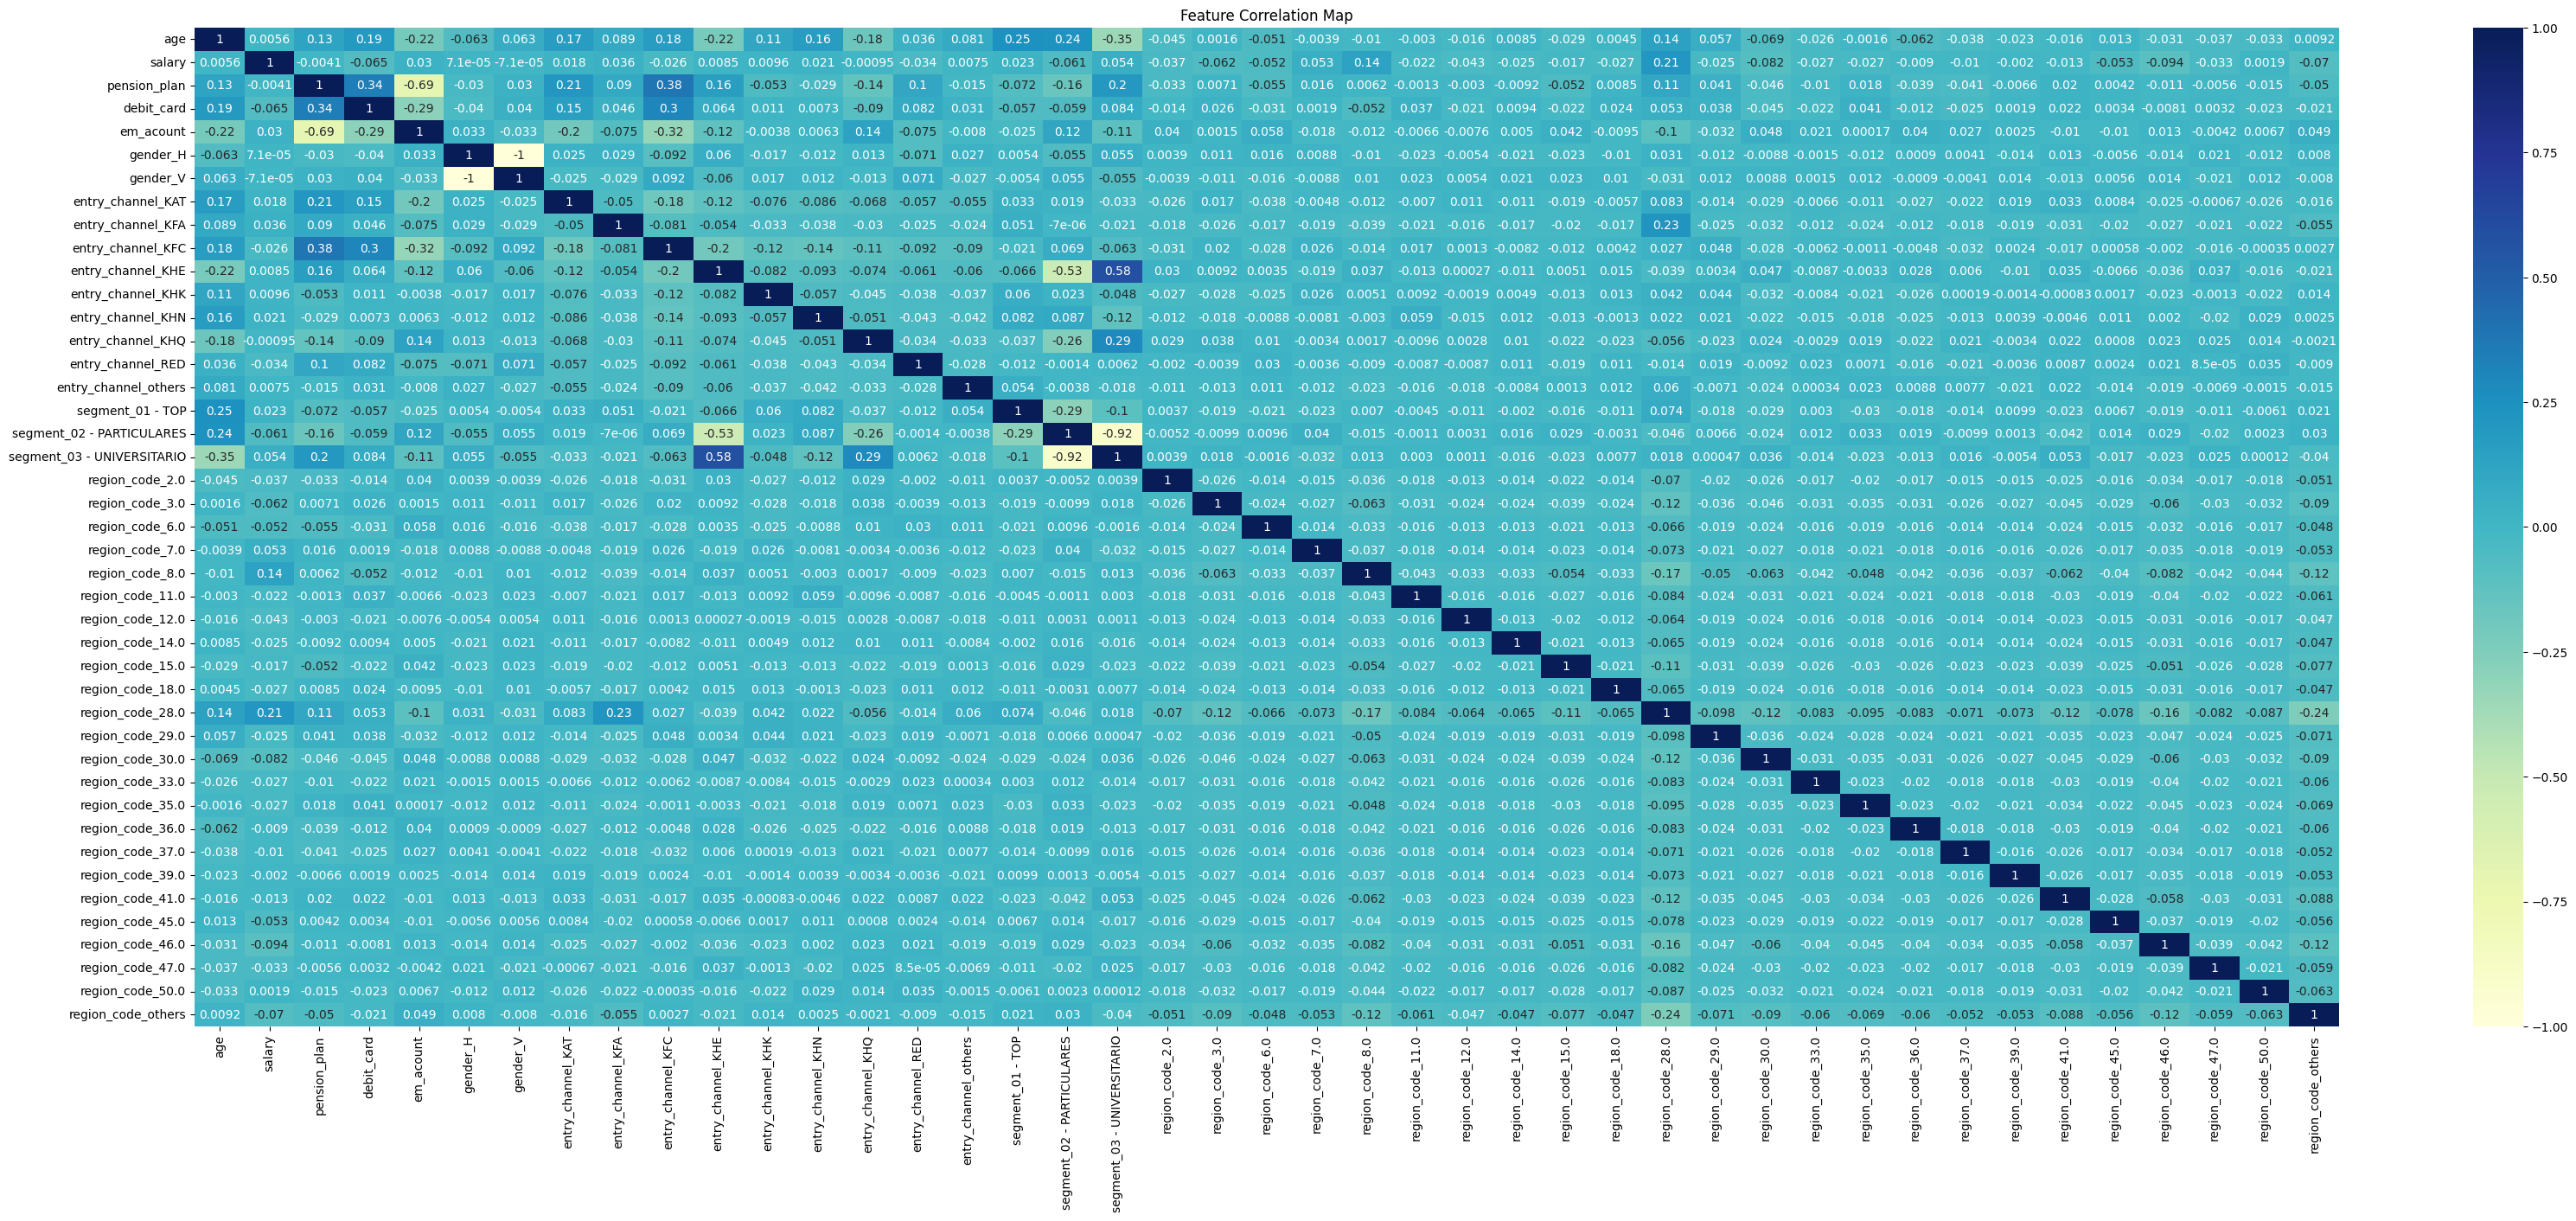

In [199]:
plt.figure(figsize=(40,15))
sns.heatmap(df5.corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

Analizo los valores float

[[<Axes: title={'center': 'age'}>]]
[[<Axes: title={'center': 'salary'}>]]


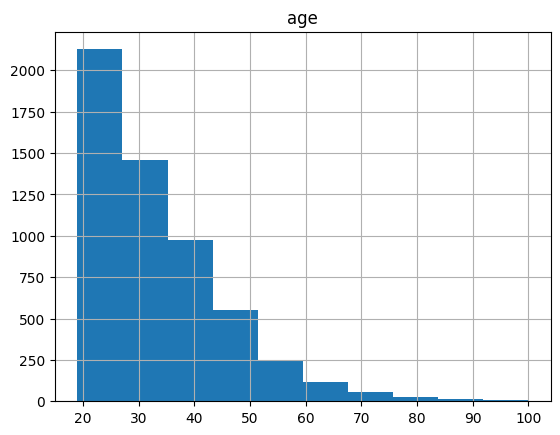

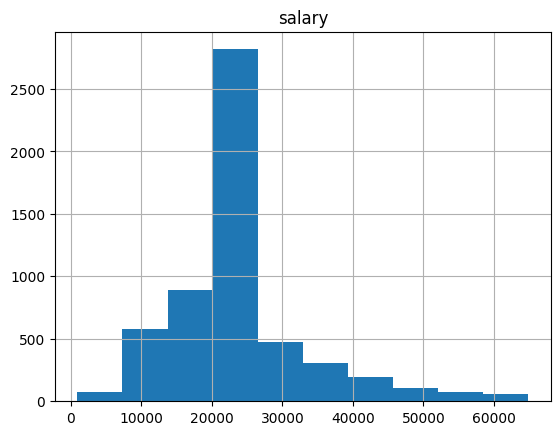

In [200]:
for i in df5.columns[:2]:
  print(df5.hist(i))

In [201]:
# busco normalizar la distribucion
df6=df5.copy()
a_predict6=a_predict5.copy()

df6["log_age"]=np.log10(df6["age"])
df6["log_salary"]=np.log10(df6["salary"])

a_predict6["log_age"]=np.log10(a_predict6["age"])
a_predict6["log_salary"]=np.log10(a_predict6["salary"])


df6.drop(['age', 'salary'], axis=1, inplace=True)
a_predict6.drop([ 'age', 'salary'], axis=1, inplace=True)

[[<Axes: title={'center': 'log_age'}>]]
[[<Axes: title={'center': 'log_salary'}>]]


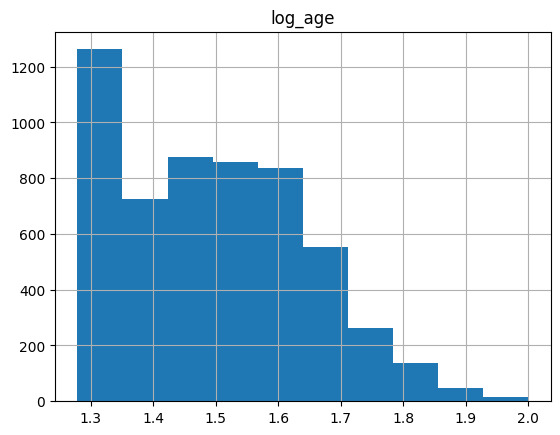

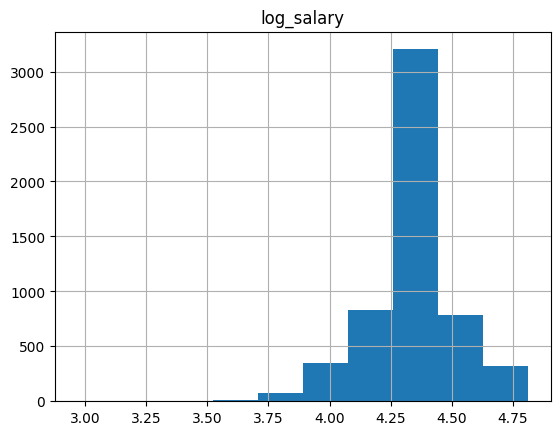

In [202]:
for i in df6.columns[-2:]:
  print(df6.hist(i))

[[<Axes: title={'center': 'log_age'}>]]
[[<Axes: title={'center': 'log_salary'}>]]


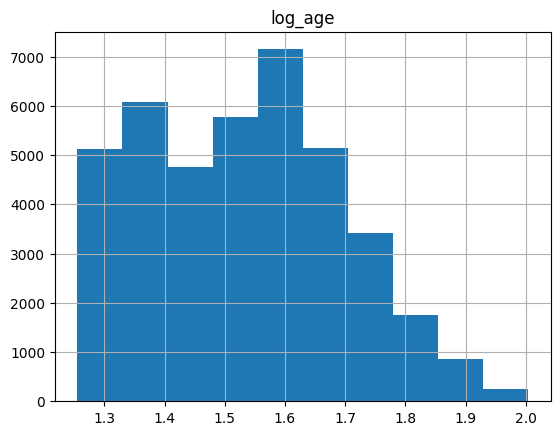

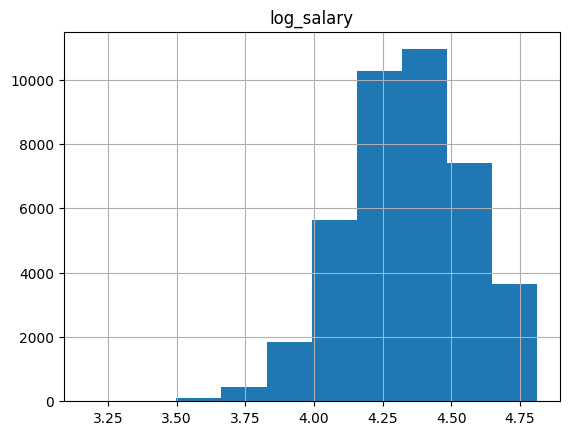

In [203]:
for i in a_predict6.columns[-2:]:
  print(a_predict6.hist(i))

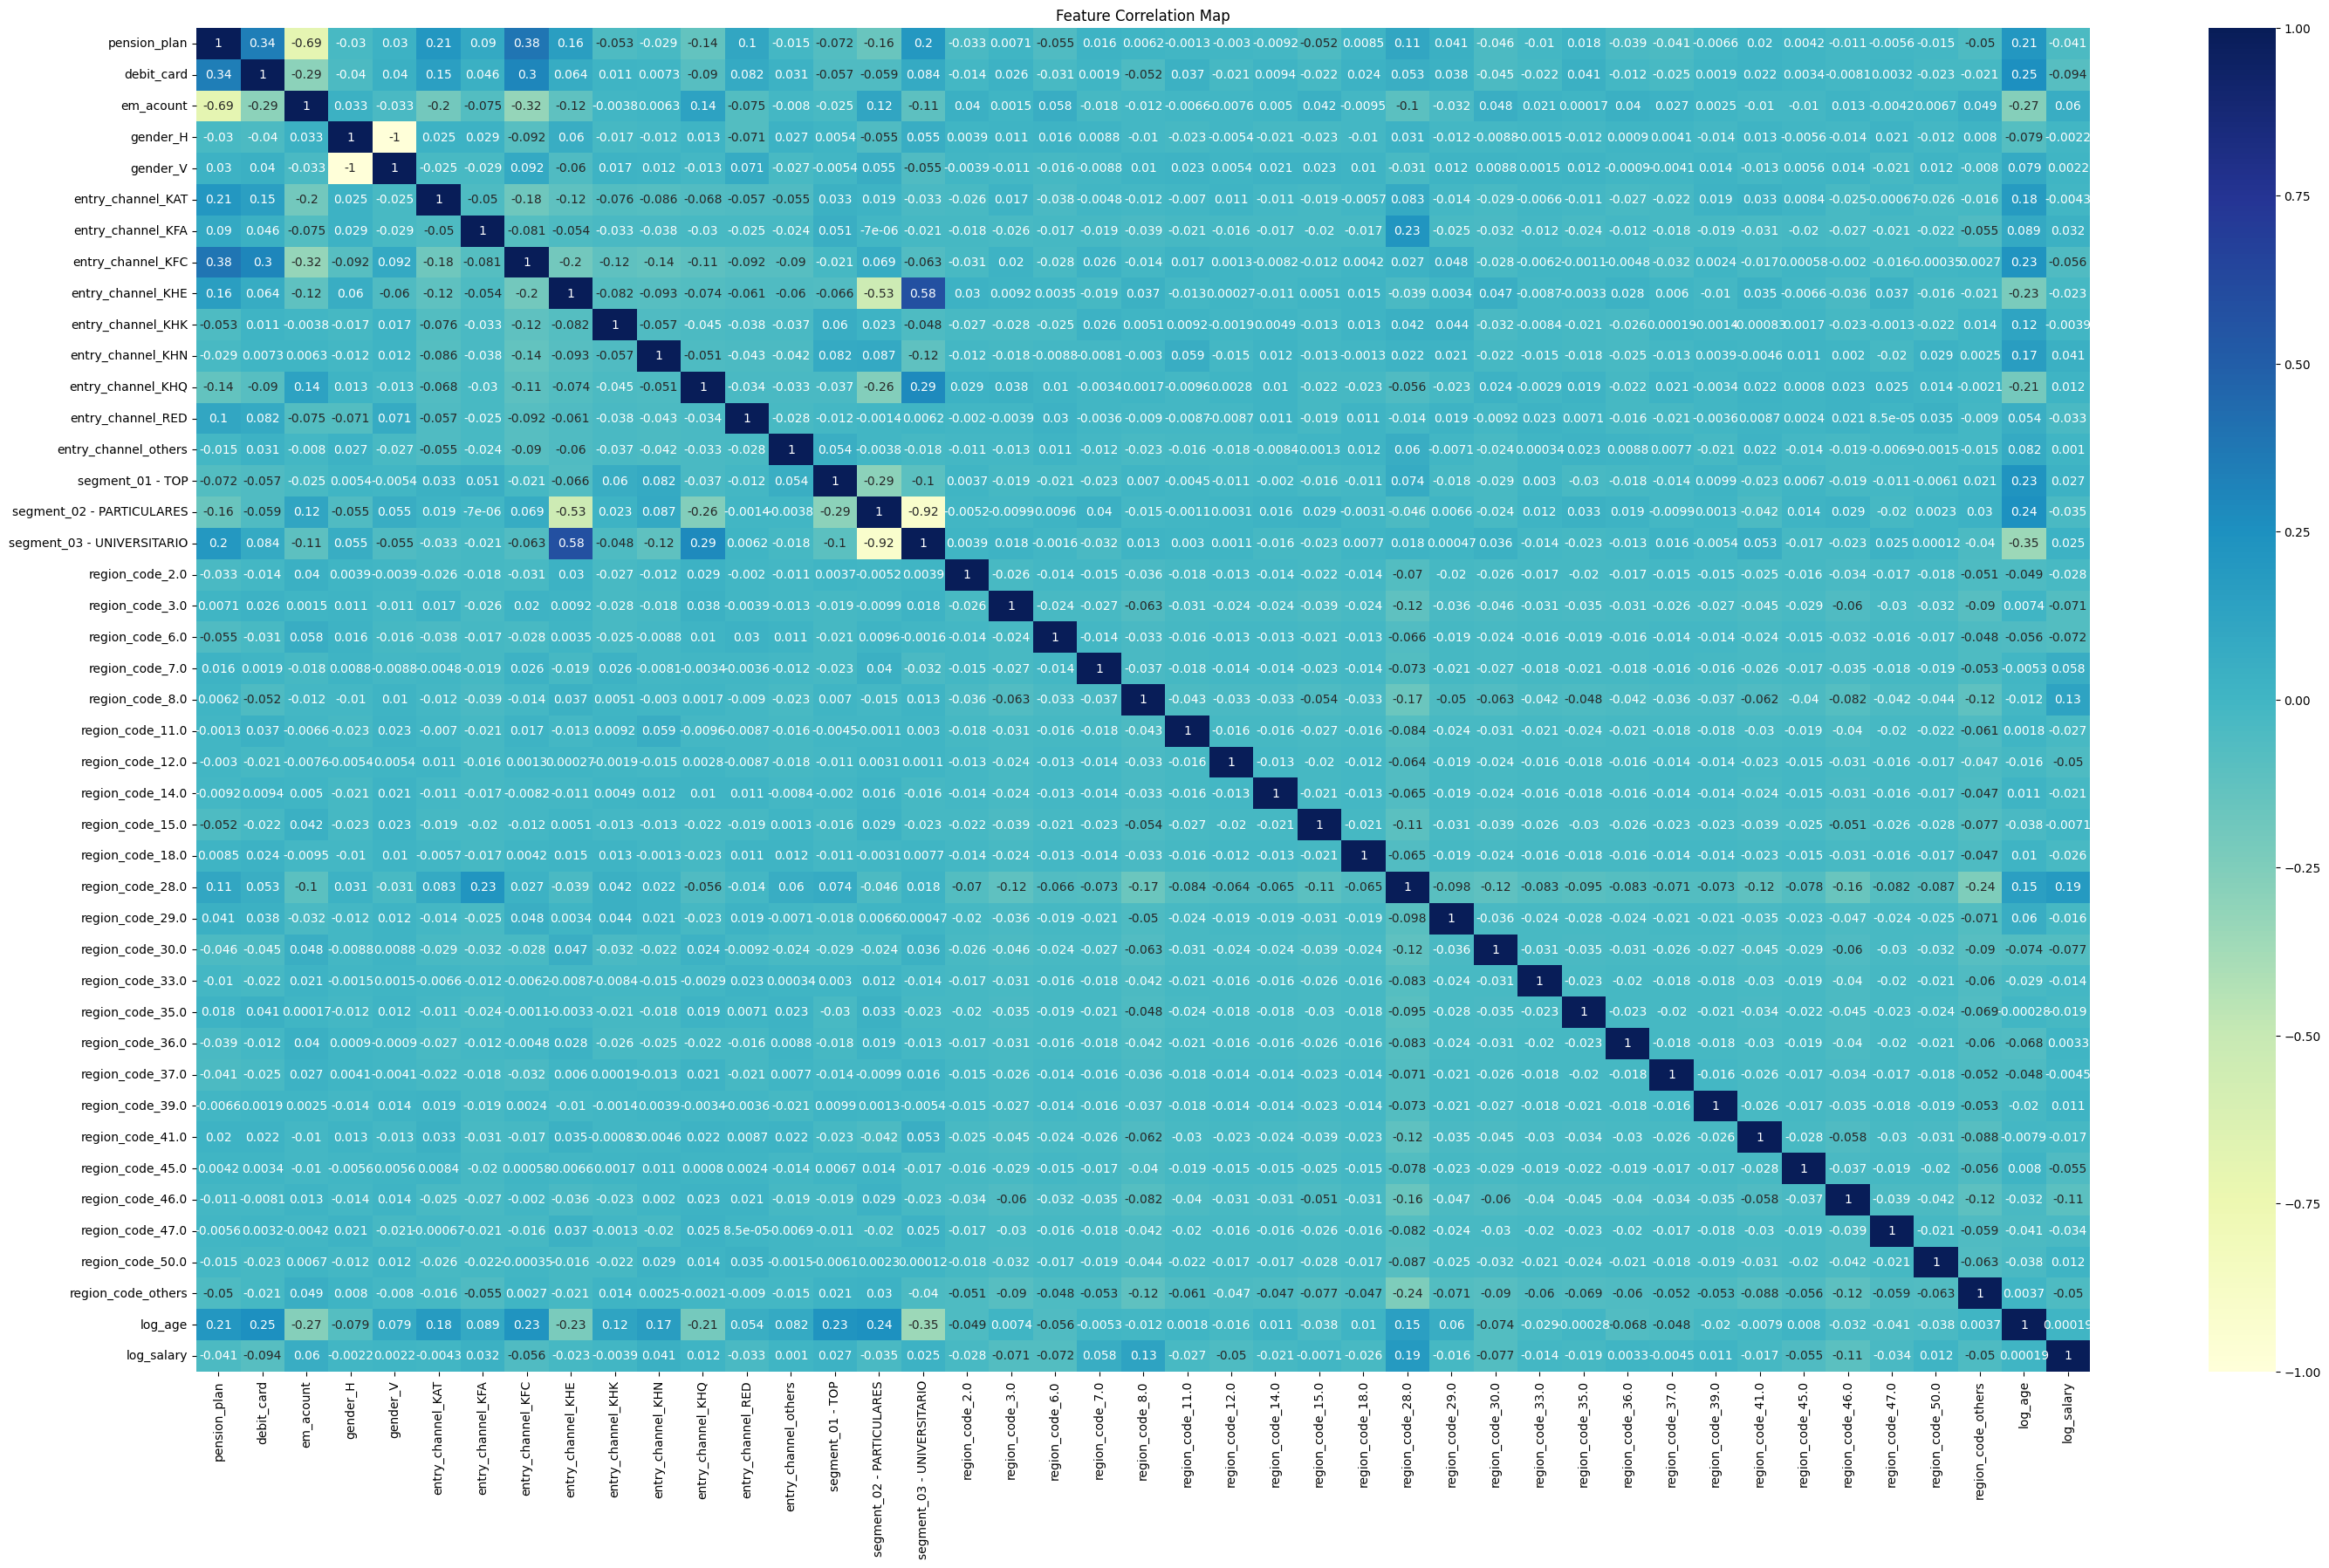

In [204]:
plt.figure(figsize=(35,20))
sns.heatmap(df6.corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

## 9. Preparación de los Datos para el Modelo

Separamos el dataset en características (X) y la variable objetivo (y), y dividimos los datos en conjuntos de entrenamiento y prueba.

In [205]:
X = df6.drop("pension_plan",axis=1)
y = df6['pension_plan']
a_predict6= a_predict6.drop("pension_plan",axis=1)

In [206]:
#import sklearn
#print(sklearn.__version__)


In [207]:
y.value_counts()

pension_plan
0    2961
1    2618
Name: count, dtype: int64

### División del dataset en entrenamiento y prueba

In [208]:
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [209]:
print(X_train.shape[0])
print(X_test.shape[0])

3905
1674


In [210]:
y_train.value_counts()

pension_plan
0    2065
1    1840
Name: count, dtype: int64

### Estandarización de los datos

In [211]:
scaler=StandardScaler()
X_train_escaler = scaler.fit_transform(X_train)
X_test_escaler = scaler.transform(X_test)
a_predict6_escaler = scaler.transform(a_predict6)

## 10. Entrenamiento y Evaluación de Modelos

Entrenamos y evaluamos varios modelos de clasificación, comparando sus métricas para seleccionar el más adecuado.

Modelo: Logistic Regression
Precisión en Entrenamiento: 0.8614596670934699
Precisión en Prueba: 0.8542413381123058
AUC en Entrenamiento: 0.9315383198231393
AUC en Prueba: 0.9251242310870365


Modelo: Random Forest
Precisión en Entrenamiento: 1.0
Precisión en Prueba: 0.9062126642771804
AUC en Entrenamiento: 1.0
AUC en Prueba: 0.9619065311696658


Modelo: Gradient Boosting
Precisión en Entrenamiento: 0.9229193341869398
Precisión en Prueba: 0.9091995221027479
AUC en Entrenamiento: 0.9810444520475841
AUC en Prueba: 0.9706306807748807


Modelo: SVM
Precisión en Entrenamiento: 0.8791293213828425
Precisión en Prueba: 0.8524492234169654
AUC en Entrenamiento: 0.9463019791557006
AUC en Prueba: 0.916765171685641


Modelo: KNN
Precisión en Entrenamiento: 0.8701664532650448
Precisión en Prueba: 0.8106332138590203
AUC en Entrenamiento: 0.951113538267186
AUC en Prueba: 0.8870307622567022


Modelo: Naive Bayes
Precisión en Entrenamiento: 0.7946222791293214
Precisión en Prueba: 0.7933094384707288
AUC e

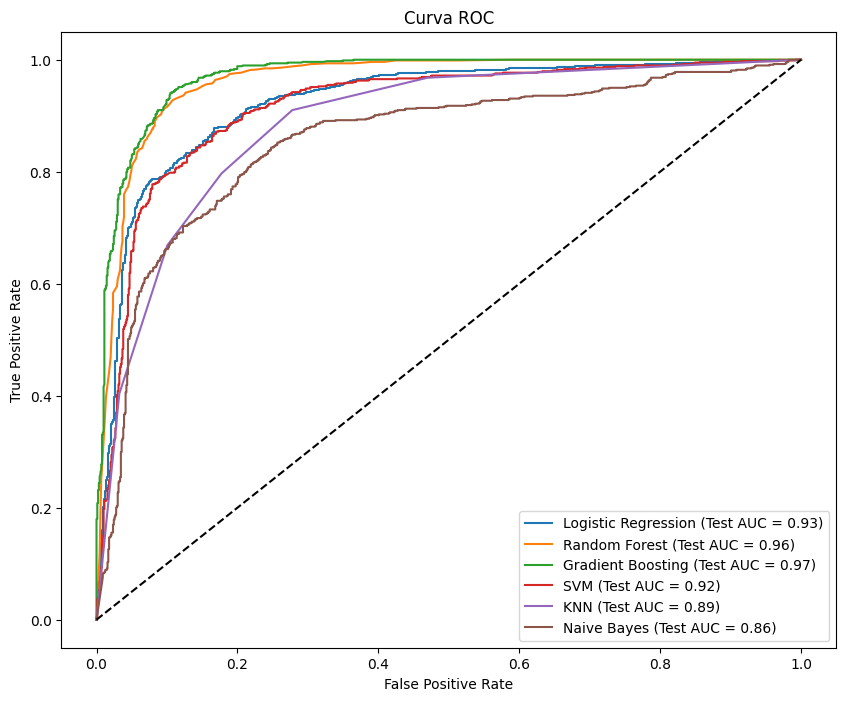

                 Model  Train Accuracy  Test Accuracy  Train AUC  Test AUC
0  Logistic Regression        0.861460       0.854241   0.931538  0.925124
1        Random Forest        1.000000       0.906213   1.000000  0.961907
2    Gradient Boosting        0.922919       0.909200   0.981044  0.970631
3                  SVM        0.879129       0.852449   0.946302  0.916765
4                  KNN        0.870166       0.810633   0.951114  0.887031
5          Naive Bayes        0.794622       0.793309   0.856288  0.855476


In [212]:
# Lista para almacenar las métricas de cada modelo
metrics = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Train AUC': [],
    'Test AUC': []
}

# Crear una lista de modelos para comparar
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),  # Necesario para obtener las probabilidades
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Entrenar y evaluar modelos
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_escaler, y_train)

    # Predecir las probabilidades y las etiquetas
    y_train_proba = model.predict_proba(X_train_escaler)[:, 1]  # Probabilidades de la clase positiva
    y_test_proba = model.predict_proba(X_test_escaler)[:, 1]  # Probabilidades de la clase positiva
    y_train_pred = model.predict(X_train_escaler)
    y_test_pred = model.predict(X_test_escaler)

    # Calcular las métricas
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_auc = roc_auc_score(y_train, y_train_proba)
    test_auc = roc_auc_score(y_test, y_test_proba)

    # Almacenar las métricas
    metrics['Model'].append(name)
    metrics['Train Accuracy'].append(train_accuracy)
    metrics['Test Accuracy'].append(test_accuracy)
    metrics['Train AUC'].append(train_auc)
    metrics['Test AUC'].append(test_auc)

    print(f"Modelo: {name}")
    print("Precisión en Entrenamiento:", train_accuracy)
    print("Precisión en Prueba:", test_accuracy)
    print("AUC en Entrenamiento:", train_auc)
    print("AUC en Prueba:", test_auc)
    print("\n")

# Opcional: Plotear la curva ROC para cada modelo
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Predecir las probabilidades y las etiquetas
    y_test_proba = model.predict_proba(X_test_escaler)[:, 1]  # Probabilidades de la clase positiva

    # Plotear la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f'{name} (Test AUC = {roc_auc_score(y_test, y_test_proba):.2f})')

# Plotear la línea de referencia
plt.plot([0, 1], [0, 1], 'k--')

# Configurar el gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Crear un DataFrame para visualizar las métricas
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


## 11. Modelo Final y Predicciones

Entrenamos el modelo seleccionado (Gradient Boosting) con los datos completos y hacemos predicciones para identificar clientes potenciales.

In [213]:
gbc_final = GradientBoostingClassifier(random_state=0)
gbc_final.fit(X_train_escaler, y_train)

y_pred = gbc_final.predict(X_test_escaler)

# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[819  77]
 [ 74 704]]


### Prediccion

In [214]:
y_pred_final = gbc_final.predict(a_predict6_escaler)

# Obtener los valores únicos y sus conteos
values, counts = np.unique(y_pred_final, return_counts=True)

# Mostrar los resultados
for value, count in zip(values, counts):
    print(f"Valor: {value}, Conteo: {count}")

Valor: 0, Conteo: 29611
Valor: 1, Conteo: 10698


## 12. Guardado de Resultados

Finalmente, guardamos los resultados de los clientes potenciales en un archivo CSV para su posterior análisis o acción.

In [215]:
potenciales = a_predict6.copy()
potenciales['pension_plan'] = y_pred_final
potenciales = potenciales[potenciales['pension_plan']==1]
print(potenciales.head(),'\n', '\n', potenciales.shape)


             debit_card  em_acount  gender_H  gender_V  entry_channel_KAT  \
customer_id                                                                 
36148                 1          0     False      True              False   
44949                 0          0      True     False               True   
61578                 0          0      True     False               True   
83660                 0          0      True     False               True   
89386                 0          0     False      True               True   

             entry_channel_KFA  entry_channel_KFC  entry_channel_KHE  \
customer_id                                                            
36148                    False              False              False   
44949                    False              False              False   
61578                    False              False              False   
83660                    False              False              False   
89386                    Fal

### Obtener clientes potenciales de tabla customers

In [216]:
customers_potenciales = customers.copy()


# Guardar indice de clientes potencialese para luego filtrarlos en listado final
index_potenciales = list(potenciales.index.values)

# Filtar los potenciales
customers_potenciales_final = customers_potenciales[customers_potenciales.customer_id.isin(index_potenciales)]
customers_potenciales_final.head()




customer_id country_id  region_code gender  age    salary entry_date  \
37         36148         ES         28.0      V   58  31200.47    2020-12   
51         44949         ES         28.0      H   54  19663.55    2019-05   
85         61578         ES          8.0      H   57  49228.99    2022-02   
117        83660         ES         13.0      H   47  16512.50    2021-05   
125        89386         ES         28.0      V   50  25332.40    2022-02   

    entry_channel  active_customer            segment  ...  long_term_deposit  \
37            KBG              1.0           01 - TOP  ...                  0   
51            KAT              1.0  02 - PARTICULARES  ...                  0   
85            KAT              1.0  02 - PARTICULARES  ...                  0   
117           KAT              1.0  02 - PARTICULARES  ...                  0   
125           KAT              1.0  02 - PARTICULARES  ...                  1   

     em_account_pp  credit_card  payroll  pension_plan  payroll_account  \
37               0            0        0             0                1   
51               0            1        0             0                0   
85               0            1        0             0                0   
117              0            1        0             0                0   
125              0            0        0             0                0   

     emc_account  debit_card  em_account_p  em_acount  
37             1           1             0          0  
51             0           0             0          0  
85             0           0             0          0  
117            0           0             0          0  
125            0           0             0          0  

[5 rows x 25 columns]

In [217]:
customers_potenciales_final.shape

(10698, 25)

In [218]:
customers_potenciales_final['pension_plan'].value_counts()

pension_plan
0    10698
Name: count, dtype: int64

### Exportar DF

In [219]:
pd.to_pickle(customers_potenciales_final,"/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/potenciales_sin_salary.csv")

df_recuperacion=pd.read_pickle("/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/potenciales_sin_salary.csv")
df_recuperacion.head()


customer_id country_id  region_code gender  age    salary entry_date  \
37         36148         ES         28.0      V   58  31200.47    2020-12   
51         44949         ES         28.0      H   54  19663.55    2019-05   
85         61578         ES          8.0      H   57  49228.99    2022-02   
117        83660         ES         13.0      H   47  16512.50    2021-05   
125        89386         ES         28.0      V   50  25332.40    2022-02   

    entry_channel  active_customer            segment  ...  long_term_deposit  \
37            KBG              1.0           01 - TOP  ...                  0   
51            KAT              1.0  02 - PARTICULARES  ...                  0   
85            KAT              1.0  02 - PARTICULARES  ...                  0   
117           KAT              1.0  02 - PARTICULARES  ...                  0   
125           KAT              1.0  02 - PARTICULARES  ...                  1   

     em_account_pp  credit_card  payroll  pension_plan  payroll_account  \
37               0            0        0             0                1   
51               0            1        0             0                0   
85               0            1        0             0                0   
117              0            1        0             0                0   
125              0            0        0             0                0   

     emc_account  debit_card  em_account_p  em_acount  
37             1           1             0          0  
51             0           0             0          0  
85             0           0             0          0  
117            0           0             0          0  
125            0           0             0          0  

[5 rows x 25 columns]

### Exportar CSV

In [220]:
customers_potenciales_final.to_csv('customers_potenciales_final_sin_salary.csv')

# Guardar modelo para API

In [221]:
import pickle

# Guardar el scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [222]:
# Guardar el modelo Gradient Boosting entrenado
pickle.dump(gbc_final, open("gradient_boosting_model.pkl", "wb"))

#streamlit run app.py para correrla